<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2 - Ames Housing Data and Kaggle Challenge

# Part 2

## Contents: 
Part 1: Data Import and Cleaning

Part 2: Exploratory Data Analysis and Statistics

-[Exploratory Data Analysis and Statistics](#exploratory-data-analysis-and-statistics)

-[Numeric Features](#numeric-features)

-[Sale Price](#sale-price)

-[Categorical Features](#categoric-features)

-[Variables Selection](#variables-selection)

-[Summary](#summary)

Part 3: Modelling

<a id="exploratory-data-analysis-and-statistics"></a>
# Exploratory Data Analysis and Statistics

In [1]:
import numpy as np
import pandas as pd

from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score,train_test_split

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# import train and test cleaned up data sets
train = pd.read_csv('./datasets/train_clean.csv')
test = pd.read_csv('./datasets/test_clean.csv')

In [3]:
# double check shape and head for train data set
print(train.shape)
train.head()

(2051, 81)


,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,0.0,13517,Pave,none,IR1,Lvl,...,0,0,none,none,none,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,none,IR1,Lvl,...,0,0,none,none,none,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,none,Reg,Lvl,...,0,0,none,none,none,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,none,Reg,Lvl,...,0,0,none,none,none,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,none,IR1,Lvl,...,0,0,none,none,none,0,3,2010,WD,138500


<a id="numeric-features"></a>
## Numeric Features 

In [4]:
# filter numeric features only
train_num = train.select_dtypes(include=['float64','int64'])
train_num.head()

,id,pid,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,...,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,saleprice
0,109,533352170,60,0.0,13517,6,8,1976,2005,289.0,...,0,44,0,0,0,0,0,3,2010,130500
1,544,531379050,60,43.0,11492,7,5,1996,1997,132.0,...,0,74,0,0,0,0,0,4,2009,220000
2,153,535304180,20,68.0,7922,5,7,1953,2007,0.0,...,0,52,0,0,0,0,0,1,2010,109000
3,318,916386060,60,73.0,9802,5,5,2006,2007,0.0,...,100,0,0,0,0,0,0,4,2010,174000
4,255,906425045,50,82.0,14235,6,8,1900,1993,0.0,...,0,59,0,0,0,0,0,3,2010,138500


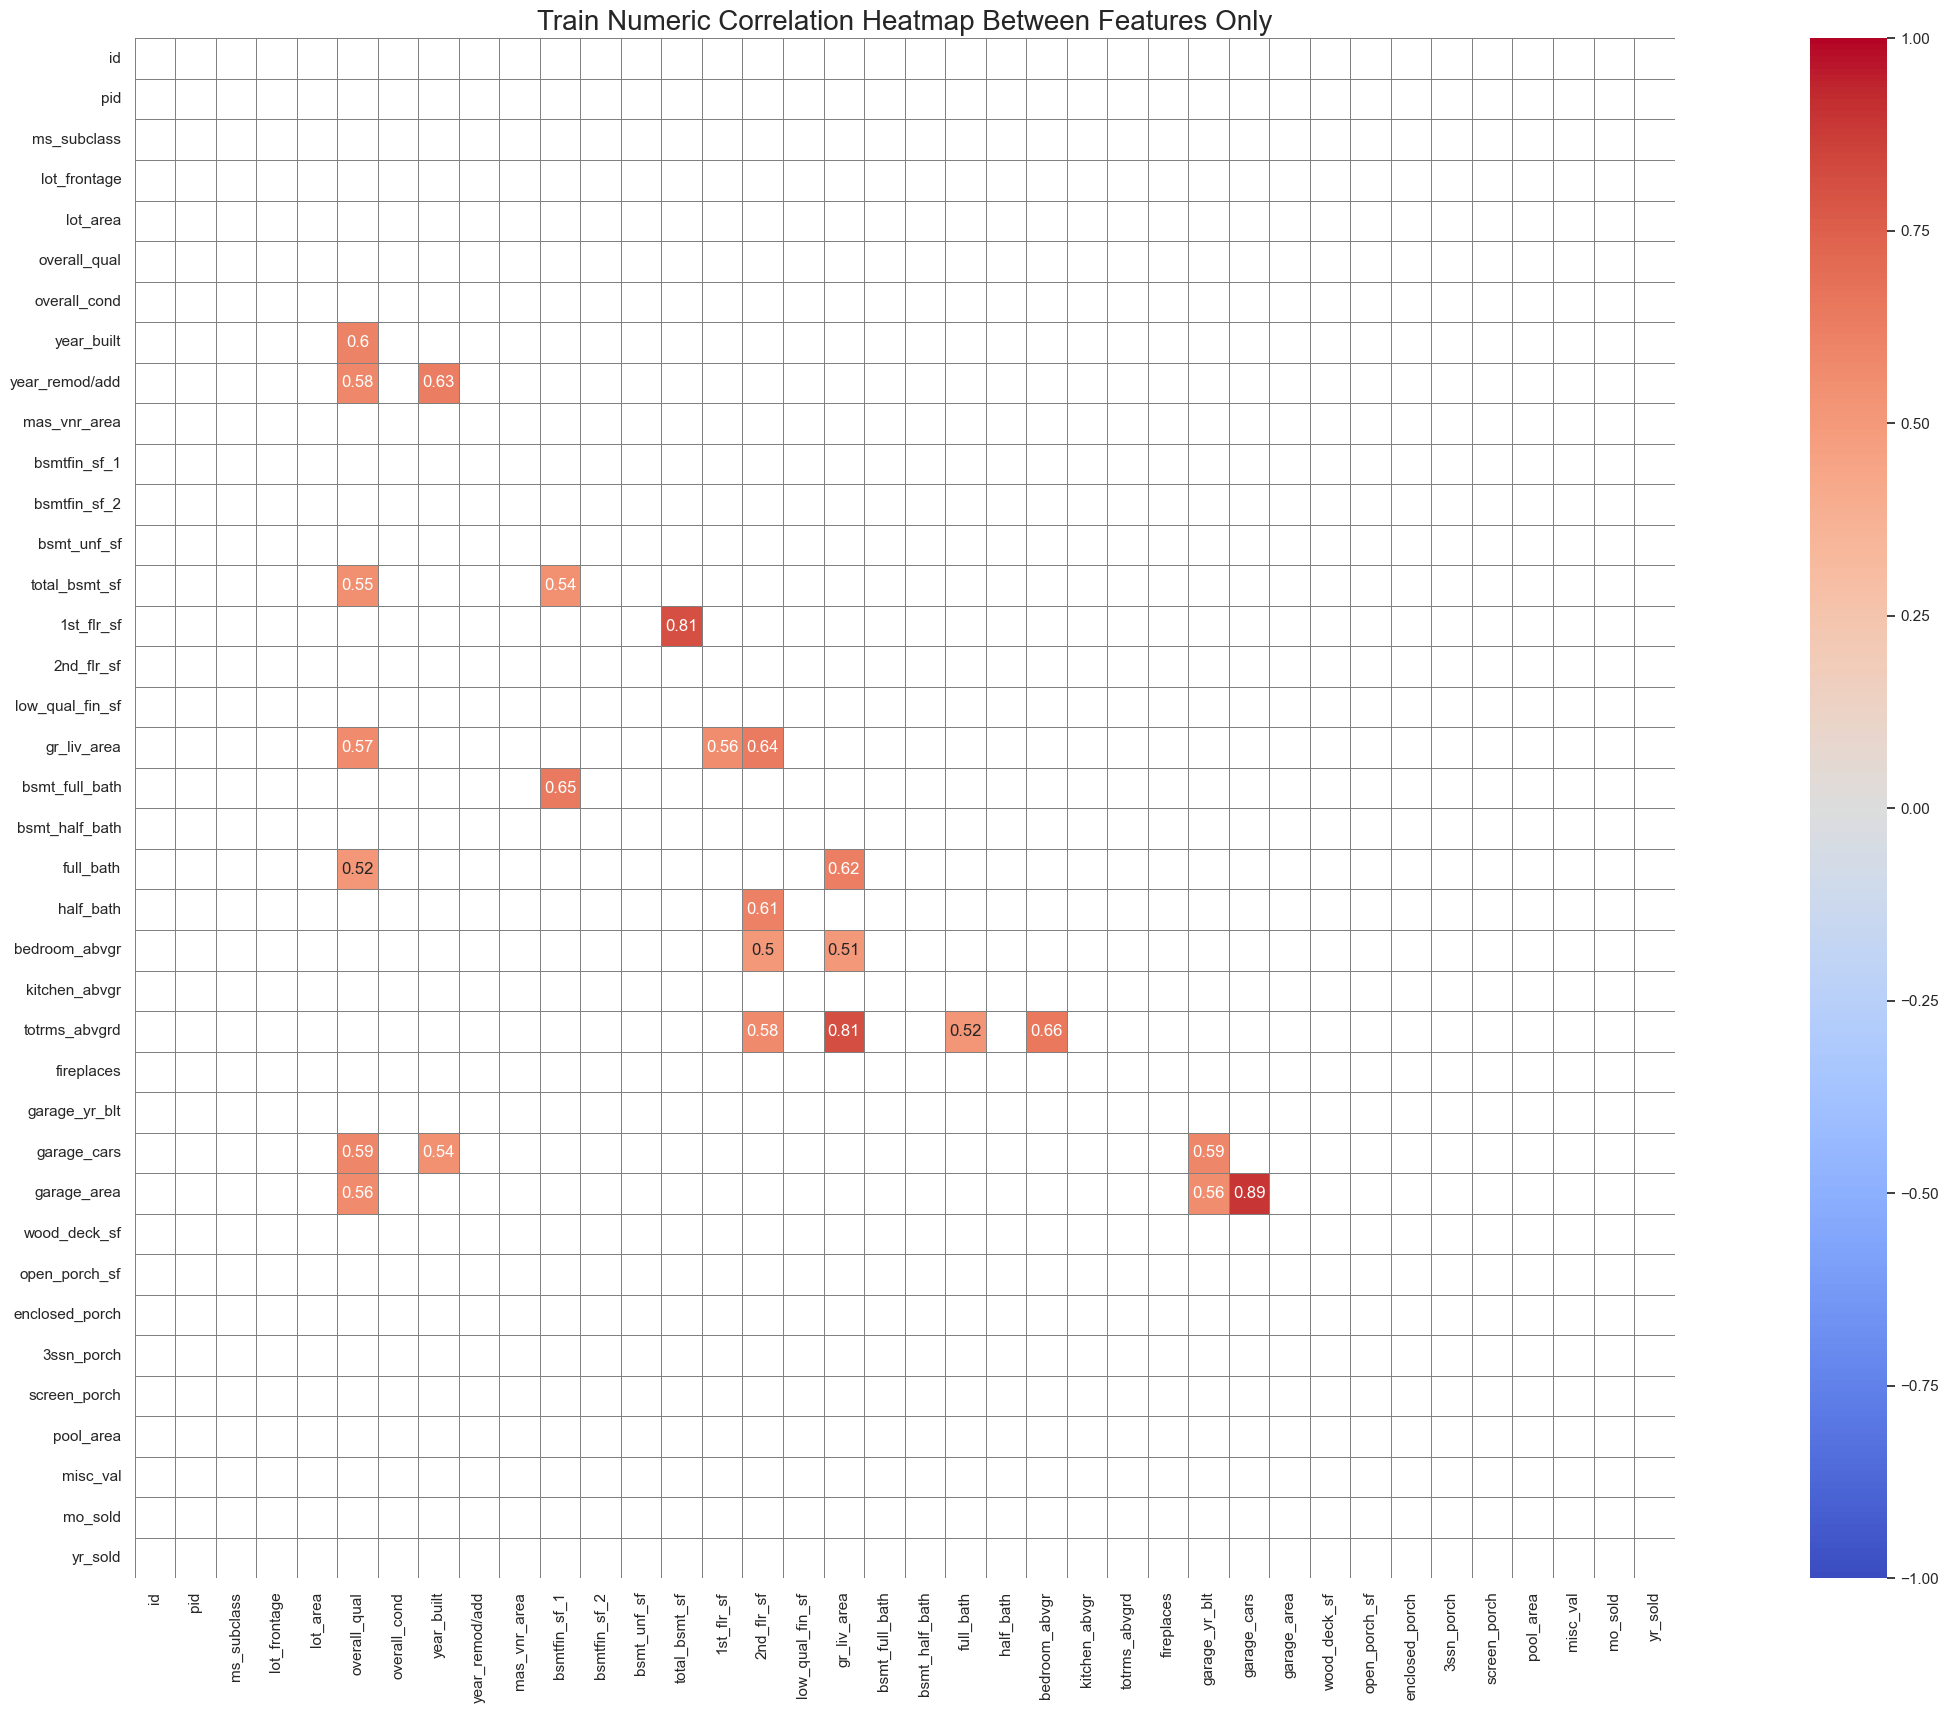

In [5]:
# plot numeric correlation heatmap between variables only for train data set
plt.figure(figsize = (35,20))

corr = train_num.drop(columns='saleprice').corr()
kot = corr[corr>=.5] # only show those with more than or equal to 0.5 correlation 

mask = np.zeros_like(kot)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    sns.heatmap(kot, mask = mask, square = True, annot = True, vmin = -1, vmax = 1, linewidths = .5, cmap='coolwarm', linecolor='grey')
    
plt.title("Train Numeric Correlation Heatmap Between Features Only", fontsize=20);

**Findings**

overall_qual has the most correlations (>0.5) with 7 other features, garage_area, garage_cars, full_bath, gr_liv_area, total_bsmt_sf, year_remod/add, year_built.

garage_cars has a very high correlation with garage_area at 0.89.

gr_liv_area has a very high correlation with totrms_abvgrd at 0.81.

total_bsmt_sf has a very high correlation with 1st_flr_sf at 0.81.

It is likely that some of these highly correlated features can be dropped as they may predict the same response. 

In [6]:
# correlation of numeric variables with saleprice
train_num.corrwith(train['saleprice']).sort_values(ascending=False)

saleprice          1.000000
overall_qual       0.800207
gr_liv_area        0.697038
garage_area        0.649897
garage_cars        0.647781
total_bsmt_sf      0.629303
1st_flr_sf         0.618486
year_built         0.571849
year_remod/add     0.550370
full_bath          0.537969
totrms_abvgrd      0.504014
mas_vnr_area       0.503579
fireplaces         0.471093
bsmtfin_sf_1       0.423856
open_porch_sf      0.333476
wood_deck_sf       0.326490
lot_area           0.296566
bsmt_full_bath     0.283332
half_bath          0.283001
garage_yr_blt      0.258645
2nd_flr_sf         0.248452
bsmt_unf_sf        0.190861
lot_frontage       0.181456
bedroom_abvgr      0.137067
screen_porch       0.134581
3ssn_porch         0.048732
mo_sold            0.032735
pool_area          0.023106
bsmtfin_sf_2       0.016432
misc_val          -0.007375
yr_sold           -0.015203
low_qual_fin_sf   -0.041594
bsmt_half_bath    -0.045290
id                -0.051398
ms_subclass       -0.087335
overall_cond      -0

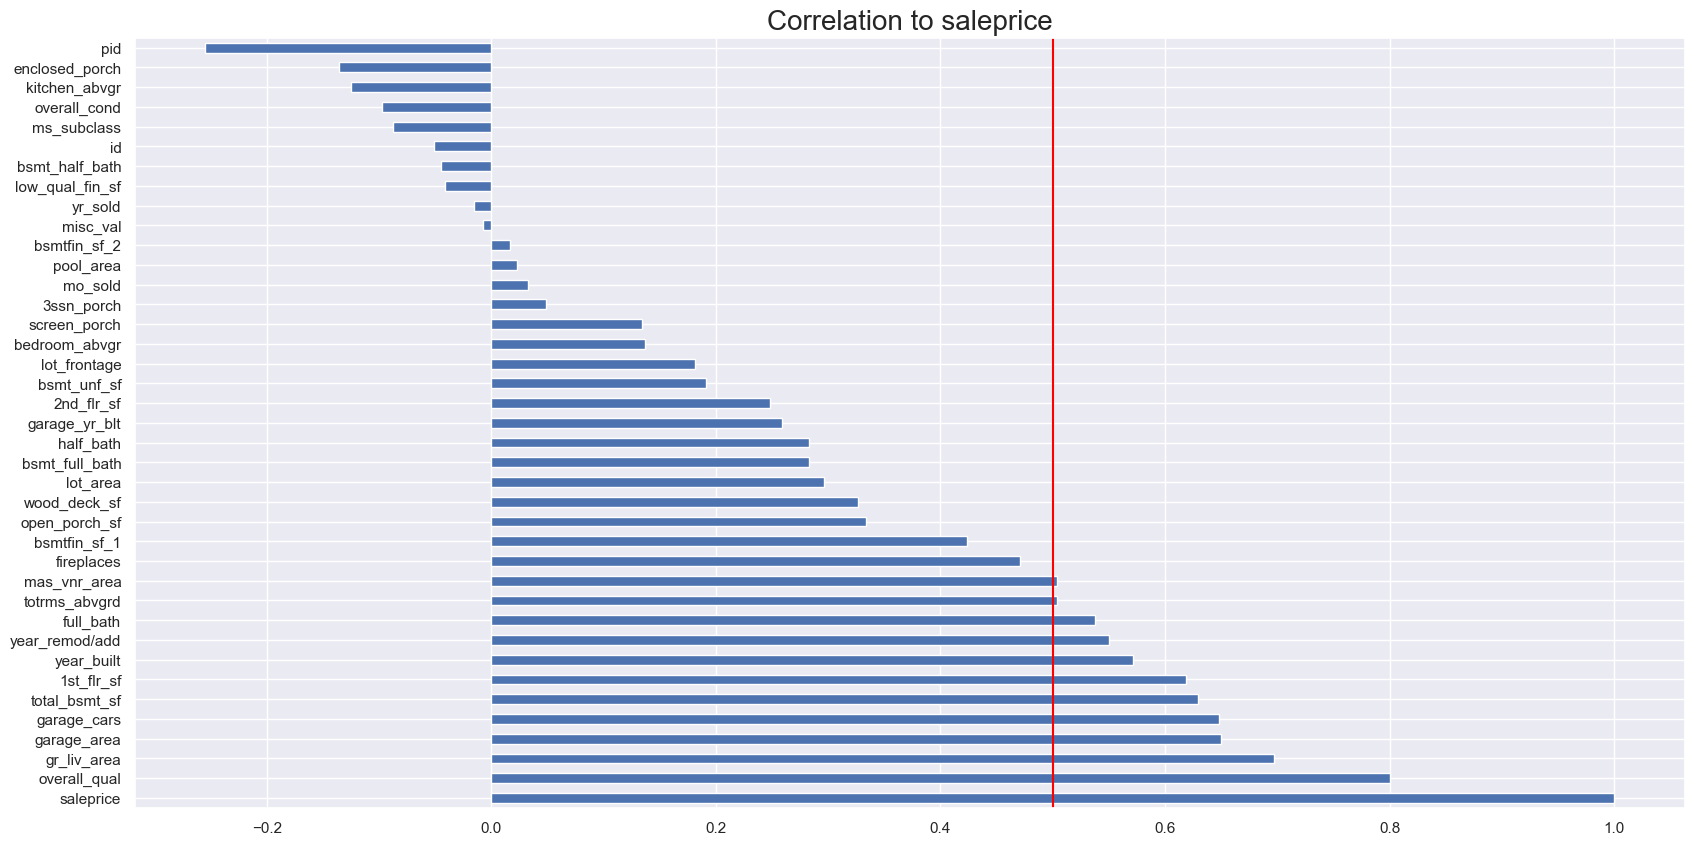

In [7]:
# plot in bar chart for visualisation
plt.figure(figsize = (20,10))

train_num.corrwith(train['saleprice']).sort_values(ascending=False).plot.barh()
plt.axvline(x = 0.5, color = 'red', label = 'axvline - full height')

plt.title("Correlation to saleprice", fontsize=20);

**Findings**

Features with above 0.5 positive correlation with saleprice = saleprice, overall_qual, gr_liv_area, garage_area, garage_cars, total_bsmt_sf, 1st_flr_sf, year_built, year_remod/add, full_bath, totrms_abvgrd, mas_vnr_area

Note that there are no features that have more than 0.5 negative correlation with saleprice, otherwise they should be included as well. 

Consider to compare this with the previous correlation heatmap between features only and choose to drop those that have high correlation. 

**Final X numeric features selected = 'overall_qual', 'gr_liv_area', 'garage_area', '1st_flr_sf', 'year_built', 'full_bath' and 'mas_vnr_area'**

'fireplaces' can be future consideration for adding to X features. 

<a id="sale-price"></a>
## Sale Price 

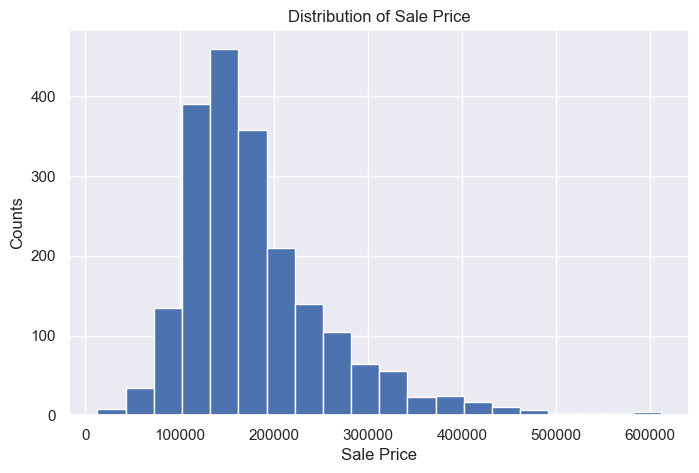

In [8]:
# plot distribution of sale price

plt.figure(figsize = (8,5))

plt.hist(train['saleprice'], bins=20, histtype='bar')

plt.ylabel('Counts')
plt.xlabel('Sale Price')
plt.title('Distribution of Sale Price');

In [9]:
train['saleprice'].describe()

count      2051.000000
mean     181469.701609
std       79258.659352
min       12789.000000
25%      129825.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: saleprice, dtype: float64

In [10]:
train['saleprice'].sort_values(ascending=False)

1671    611657
1964    591587
1692    584500
1796    582933
151     556581
         ...  
1518     35311
1292     35000
1309     34900
183      13100
1628     12789
Name: saleprice, Length: 2051, dtype: int64

In [11]:
train.columns

Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area',
       'street', 'alley', 'lot_shape', 'land_contour', 'utilities',
       'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod/add', 'roof_style',
       'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type',
       'mas_vnr_area', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1',
       'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       'heating', 'heating_qc', 'central_air', 'electrical', '1st_flr_sf',
       '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath',
       'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr',
       'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional',
       'fireplaces', 'fireplace_qu', 'garage_type', 'garage_yr_blt',
       'g

**Findings**

Average saleprice observed at 181469 

5 highest saleprice 611657, 591587, 584500, 582933, 556581

5 lowest saleprice 35311, 35000, 34900, 13100, 12789

<a id="categoric-features"></a>
## Categorical Features

In [12]:
train_cat = train.select_dtypes(include=['object'])
print(train_cat.shape)
train_cat.head()

(2051, 42)


,ms_zoning,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,...,fireplace_qu,garage_type,garage_finish,garage_qual,garage_cond,paved_drive,pool_qc,fence,misc_feature,sale_type
0,RL,Pave,none,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,...,none,Attchd,RFn,TA,TA,Y,none,none,none,WD
1,RL,Pave,none,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,...,TA,Attchd,RFn,TA,TA,Y,none,none,none,WD
2,RL,Pave,none,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,none,Detchd,Unf,TA,TA,Y,none,none,none,WD
3,RL,Pave,none,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,...,none,BuiltIn,Fin,TA,TA,Y,none,none,none,WD
4,RL,Pave,none,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,...,none,Detchd,Unf,TA,TA,N,none,none,none,WD


In [13]:
train_cat.columns

Index(['ms_zoning', 'street', 'alley', 'lot_shape', 'land_contour',
       'utilities', 'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'roof_style', 'roof_matl',
       'exterior_1st', 'exterior_2nd', 'mas_vnr_type', 'exter_qual',
       'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1', 'bsmtfin_type_2', 'heating', 'heating_qc',
       'central_air', 'electrical', 'kitchen_qual', 'functional',
       'fireplace_qu', 'garage_type', 'garage_finish', 'garage_qual',
       'garage_cond', 'paved_drive', 'pool_qc', 'fence', 'misc_feature',
       'sale_type'],
      dtype='object')

In [14]:
# include describe for non numeric features
train_summary = train.describe(include='all').T
train_summary

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,2051.0,NaN,NaN,NaN,1474.033642,843.980841,1.0,753.5,1486.0,2198.0,2930.0
pid,2051.0,NaN,NaN,NaN,713590006.091663,188691837.88533,526301100.0,528458140.0,535453200.0,907180080.0,924152030.0
ms_subclass,2051.0,NaN,NaN,NaN,57.008776,42.824223,20.0,20.0,50.0,70.0,190.0
ms_zoning,2051,7,RL,1598,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lot_frontage,2051.0,NaN,NaN,NaN,57.944417,33.137332,0.0,43.5,63.0,78.0,313.0
...,...,...,...,...,...,...,...,...,...,...,...
misc_val,2051.0,NaN,NaN,NaN,51.574354,573.393985,0.0,0.0,0.0,0.0,17000.0
mo_sold,2051.0,NaN,NaN,NaN,6.219893,2.744736,1.0,4.0,6.0,8.0,12.0
yr_sold,2051.0,NaN,NaN,NaN,2007.775719,1.312014,2006.0,2007.0,2008.0,2009.0,2010.0
sale_type,2051,9,WD,1781,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
(train_summary[train_summary['freq']>(0.8*2051)]).sort_values('freq', ascending=False)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
utilities,2051,3,AllPub,2049,NaN,NaN,NaN,NaN,NaN,NaN,NaN
street,2051,2,Pave,2044,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pool_qc,2051,5,none,2042,NaN,NaN,NaN,NaN,NaN,NaN,NaN
condition_2,2051,8,Norm,2025,NaN,NaN,NaN,NaN,NaN,NaN,NaN
roof_matl,2051,6,CompShg,2025,NaN,NaN,NaN,NaN,NaN,NaN,NaN
heating,2051,5,GasA,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN
misc_feature,2051,6,none,1986,NaN,NaN,NaN,NaN,NaN,NaN,NaN
land_slope,2051,3,Gtl,1953,NaN,NaN,NaN,NaN,NaN,NaN,NaN
functional,2051,8,Typ,1915,NaN,NaN,NaN,NaN,NaN,NaN,NaN
alley,2051,3,none,1911,NaN,NaN,NaN,NaN,NaN,NaN,NaN


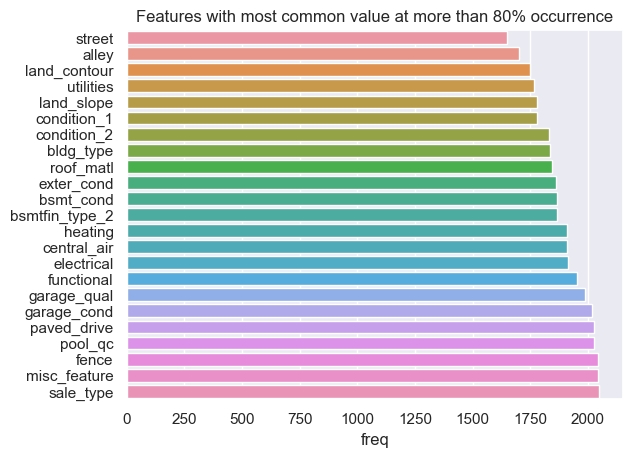

In [16]:
# plot bar chart for visualisation of features with most common value at more than 80% occurrence
train_freq_80 = train_summary[train_summary['freq']>(0.8*2051)]

sns.barplot(data=train_freq_80.sort_values('freq'), x="freq", y=train_freq_80.index)
plt.title('Features with most common value at more than 80% occurrence');

In [17]:
# create list
cat_to_drop = train_freq_80.index.tolist()

In [18]:
train_cat = train_cat.drop(columns=cat_to_drop)

In [19]:
print(train_cat.shape)
train_cat.head()

(2051, 19)


,ms_zoning,lot_shape,lot_config,neighborhood,house_style,roof_style,exterior_1st,exterior_2nd,mas_vnr_type,exter_qual,foundation,bsmt_qual,bsmt_exposure,bsmtfin_type_1,heating_qc,kitchen_qual,fireplace_qu,garage_type,garage_finish
0,RL,IR1,CulDSac,Sawyer,2Story,Gable,HdBoard,Plywood,BrkFace,Gd,CBlock,TA,No,GLQ,Ex,Gd,none,Attchd,RFn
1,RL,IR1,CulDSac,SawyerW,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,PConc,Gd,No,GLQ,Ex,Gd,TA,Attchd,RFn
2,RL,Reg,Inside,NAmes,1Story,Gable,VinylSd,VinylSd,None,TA,CBlock,TA,No,GLQ,TA,Gd,none,Detchd,Unf
3,RL,Reg,Inside,Timber,2Story,Gable,VinylSd,VinylSd,None,TA,PConc,Gd,No,Unf,Gd,TA,none,BuiltIn,Fin
4,RL,IR1,Inside,SawyerW,1.5Fin,Gable,Wd Sdng,Plywood,None,TA,PConc,Fa,No,Unf,TA,TA,none,Detchd,Unf


In [20]:
train_cat.columns

Index(['ms_zoning', 'lot_shape', 'lot_config', 'neighborhood', 'house_style',
       'roof_style', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type',
       'exter_qual', 'foundation', 'bsmt_qual', 'bsmt_exposure',
       'bsmtfin_type_1', 'heating_qc', 'kitchen_qual', 'fireplace_qu',
       'garage_type', 'garage_finish'],
      dtype='object')

### Boxplot for categoric features vs saleprice

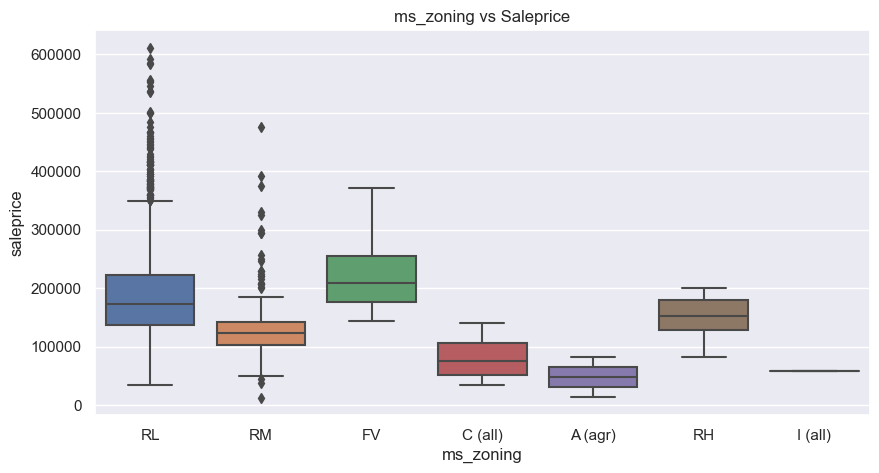

In [21]:
plt.figure(figsize = (10,5))

sns.boxplot(data=train, x="ms_zoning", y="saleprice")
plt.title('ms_zoning vs Saleprice');

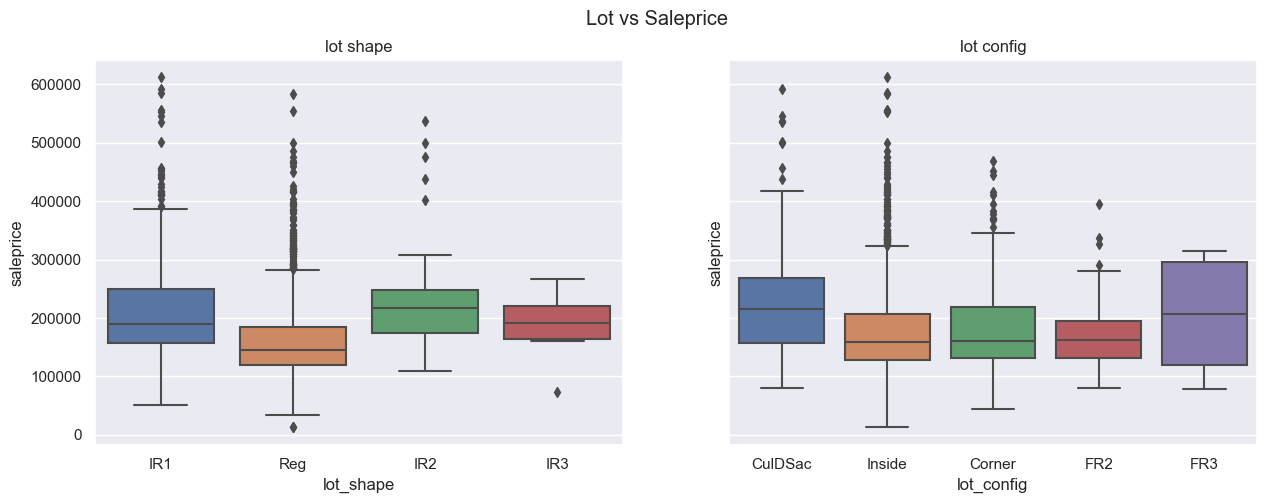

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

sns.boxplot(ax=axes[0], data=train, x="lot_shape", y="saleprice")
axes[0].set_title('lot shape')

sns.boxplot(ax=axes[1], data=train, x="lot_config", y="saleprice")
axes[1].set_title('lot config')

fig.suptitle('Lot vs Saleprice');

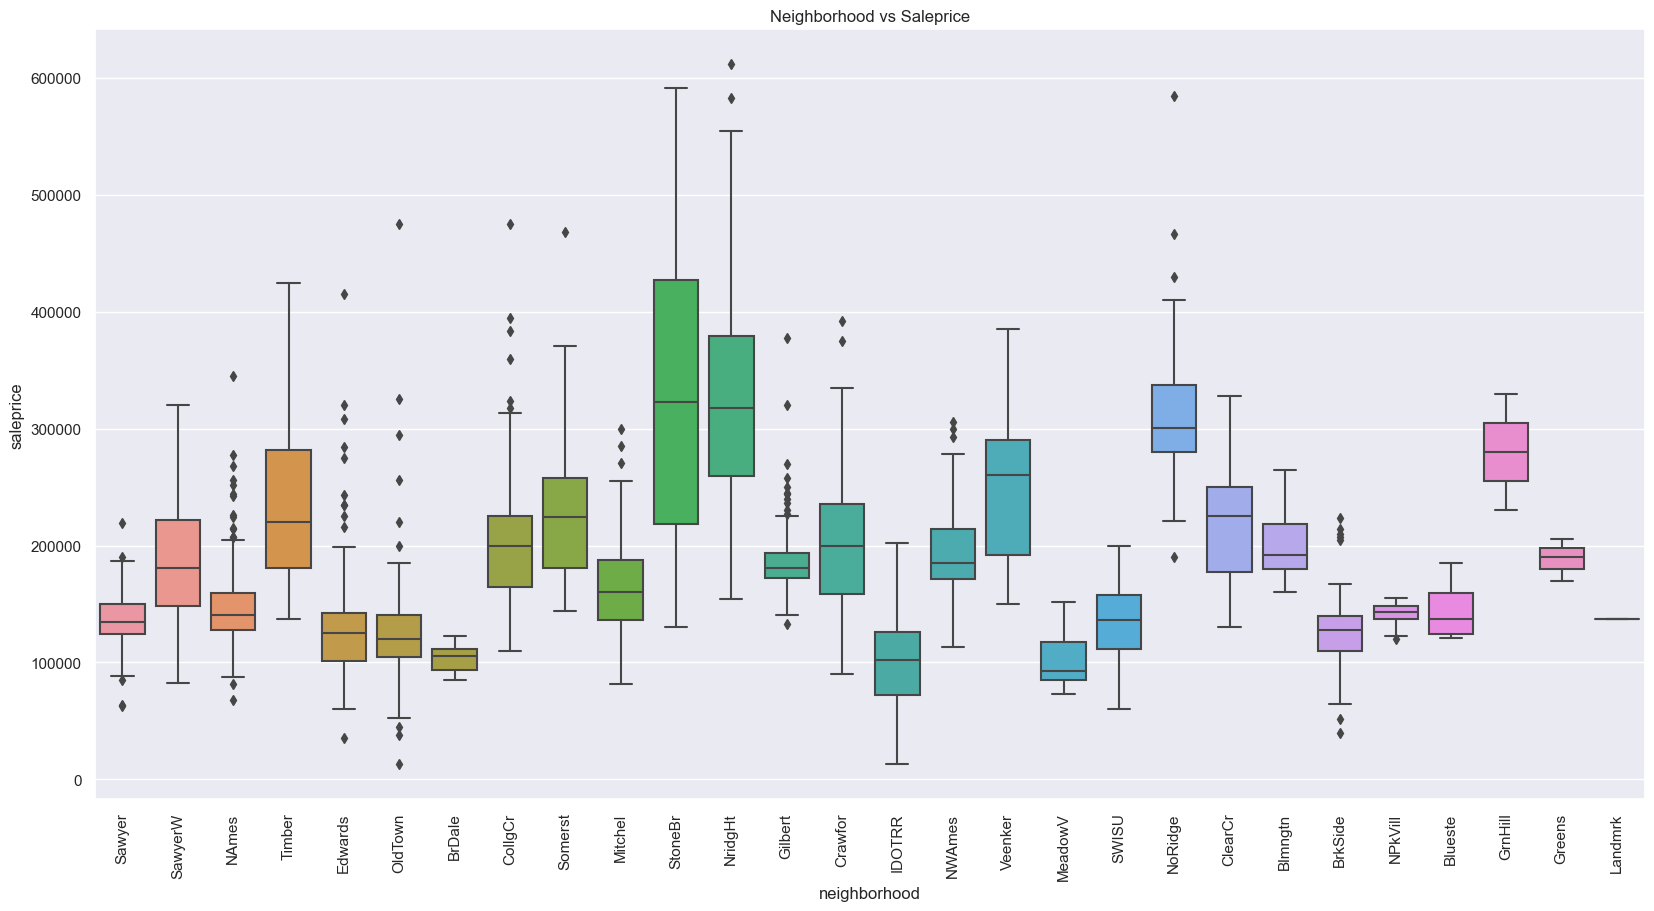

In [23]:
plt.figure(figsize = (20,10))

sns.boxplot(data=train, x="neighborhood", y="saleprice")
plt.xticks(rotation=90)
plt.title('Neighborhood vs Saleprice');

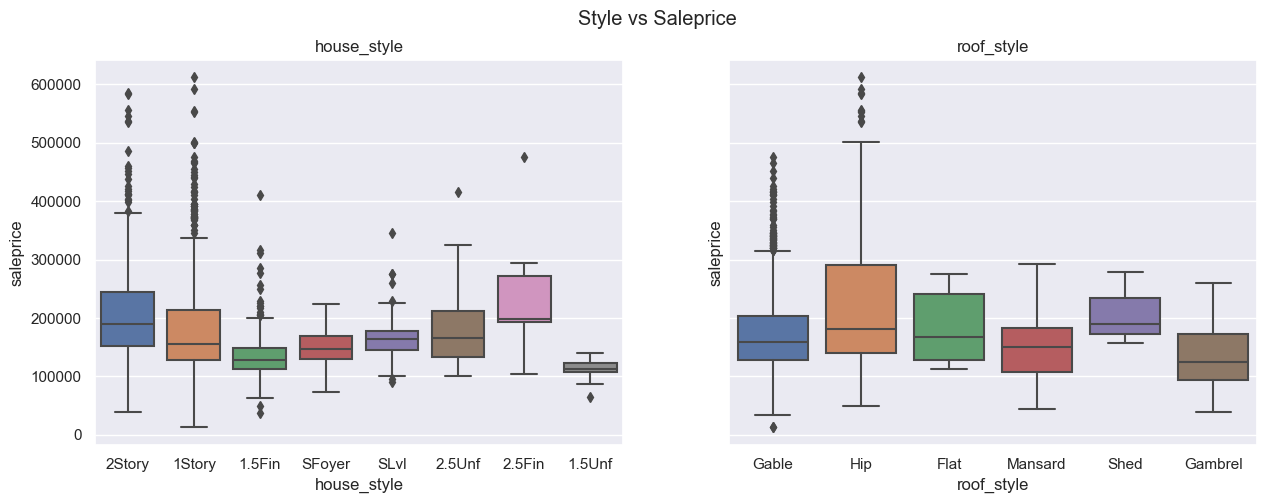

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

sns.boxplot(ax=axes[0], data=train, x="house_style", y="saleprice")
axes[0].set_title('house_style')

sns.boxplot(ax=axes[1], data=train, x="roof_style", y="saleprice")
axes[1].set_title('roof_style')

fig.suptitle('Style vs Saleprice');

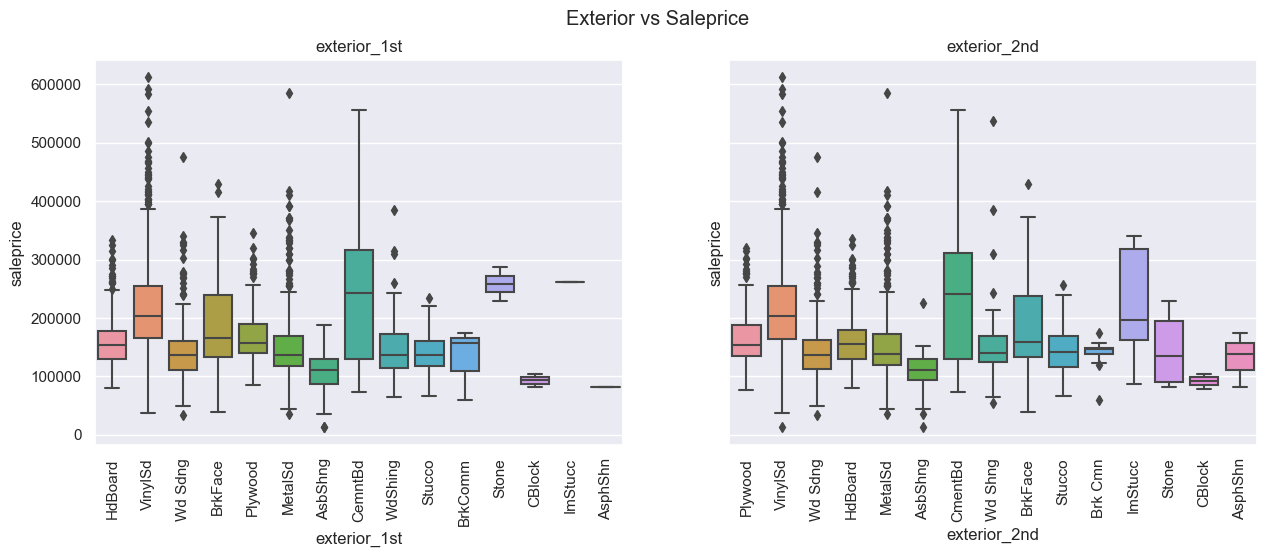

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

sns.boxplot(ax=axes[0], data=train, x="exterior_1st", y="saleprice")
axes[0].set_title('exterior_1st')
axes[0].tick_params(axis='x', rotation=90)

sns.boxplot(ax=axes[1], data=train, x="exterior_2nd", y="saleprice")
axes[1].set_title('exterior_2nd')
axes[1].tick_params(axis='x', rotation=90)

fig.suptitle('Exterior vs Saleprice');

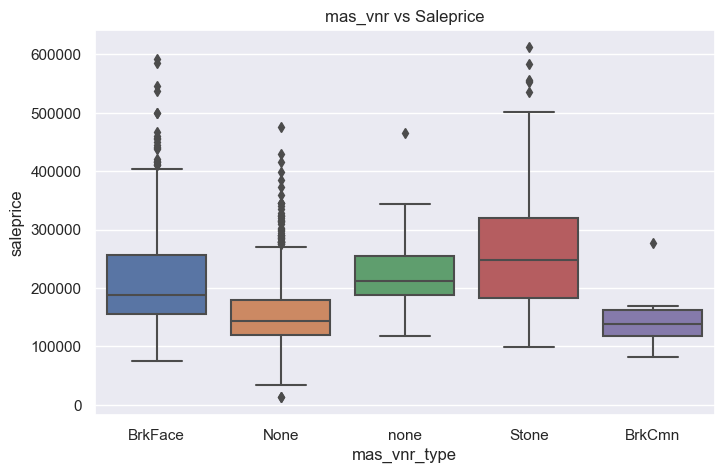

In [26]:
plt.figure(figsize = (8,5))

sns.boxplot(data=train, x="mas_vnr_type", y="saleprice")

plt.title('mas_vnr vs Saleprice');

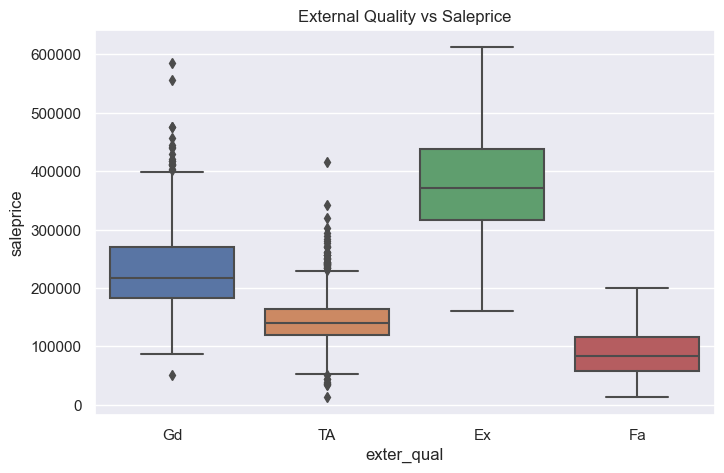

In [27]:
plt.figure(figsize = (8,5))

sns.boxplot(data=train, x="exter_qual", y="saleprice")

plt.title('External Quality vs Saleprice');

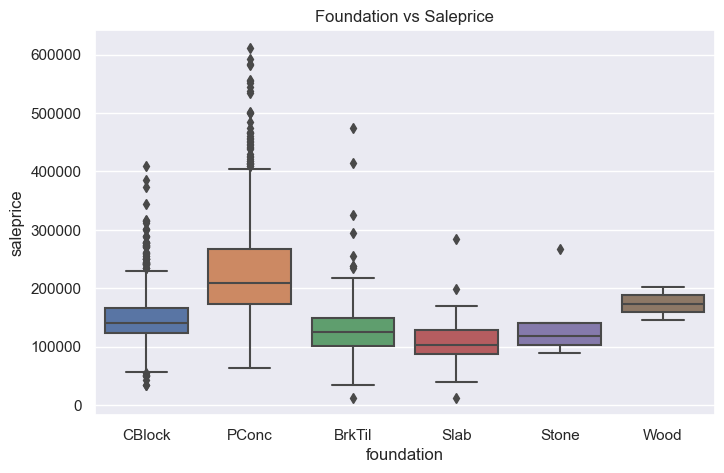

In [28]:
plt.figure(figsize = (8,5))

sns.boxplot(data=train, x="foundation", y="saleprice")

plt.title('Foundation vs Saleprice');

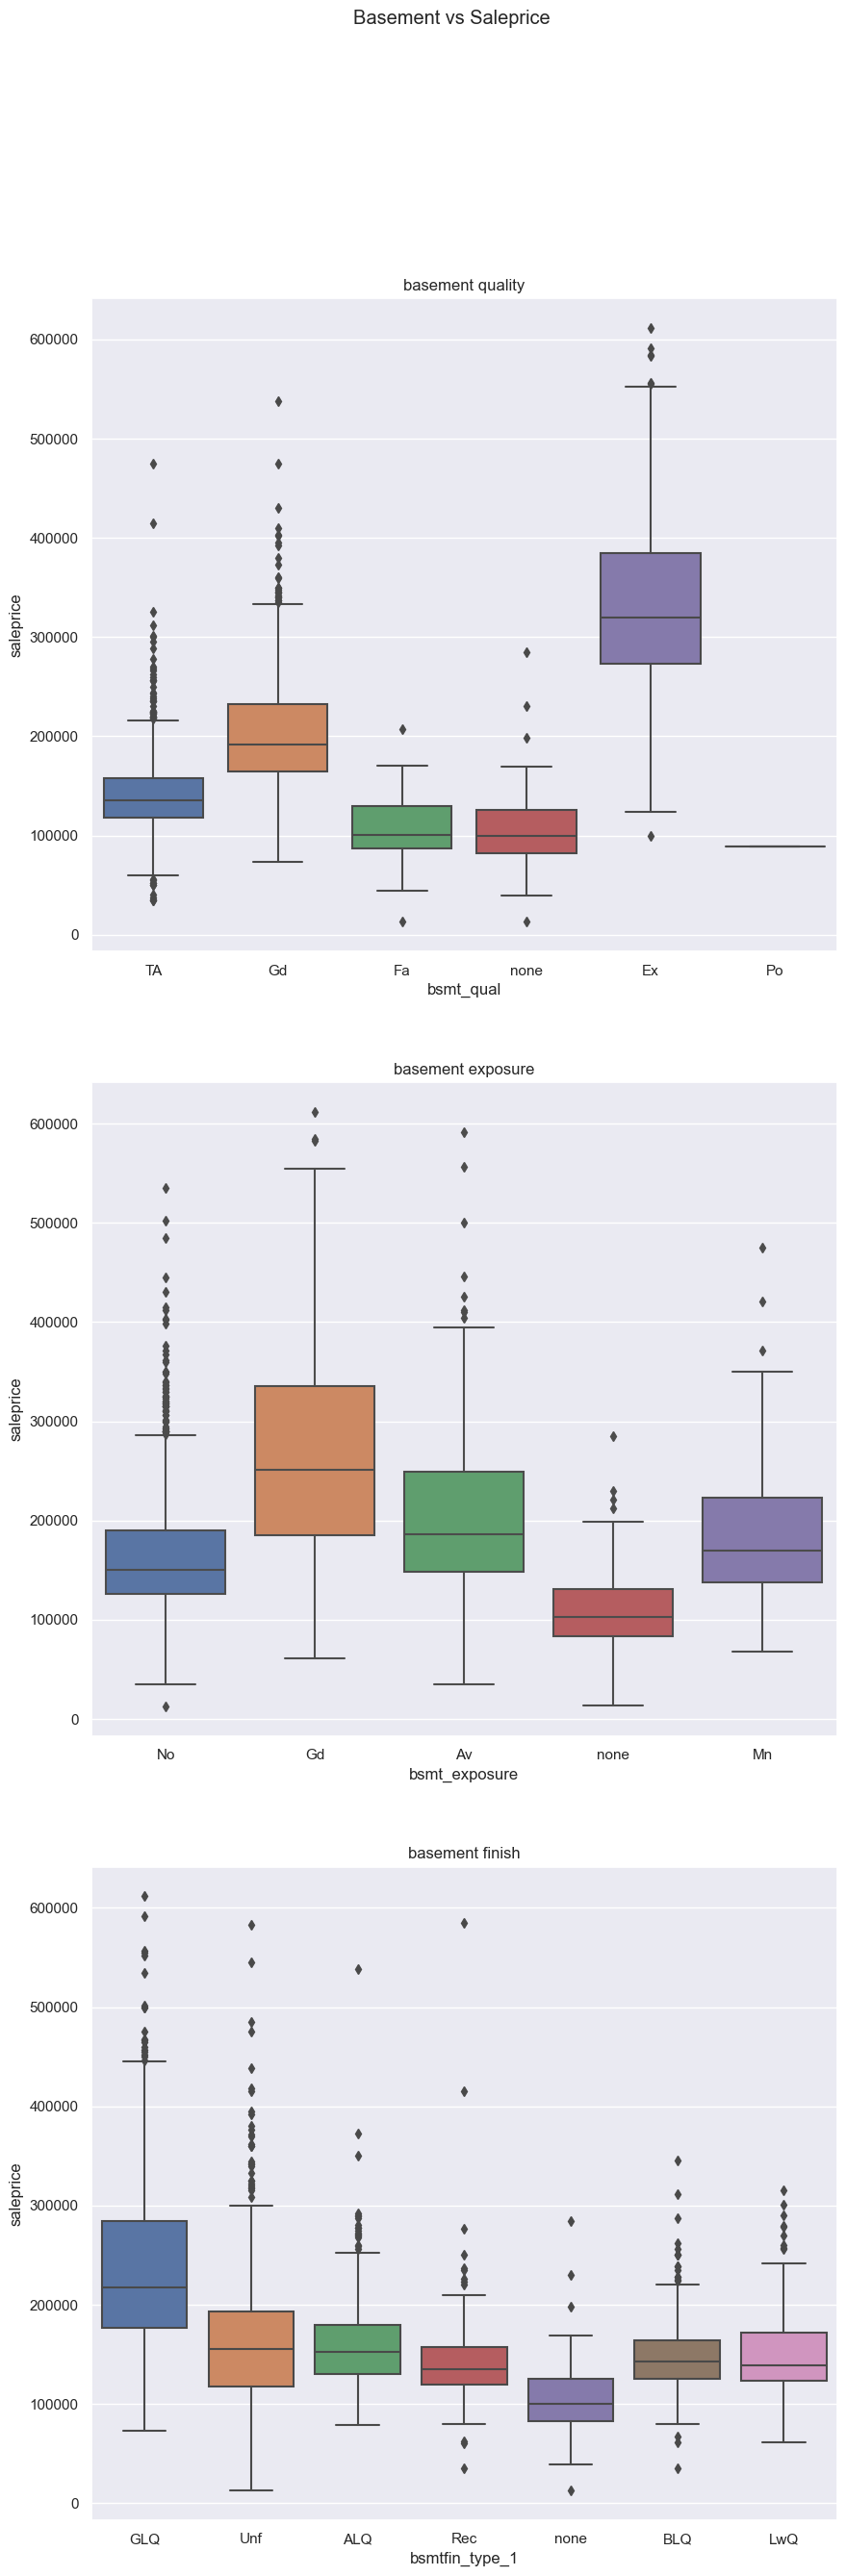

In [29]:
fig, axes = plt.subplots(3, 1, figsize=(10, 30), sharey=True)

sns.boxplot(ax=axes[0], data=train, x="bsmt_qual", y="saleprice")
axes[0].set_title('basement quality')

sns.boxplot(ax=axes[1], data=train, x="bsmt_exposure", y="saleprice")
axes[1].set_title('basement exposure')

sns.boxplot(ax=axes[2], data=train, x="bsmtfin_type_1", y="saleprice")
axes[2].set_title('basement finish')

fig.suptitle('Basement vs Saleprice');

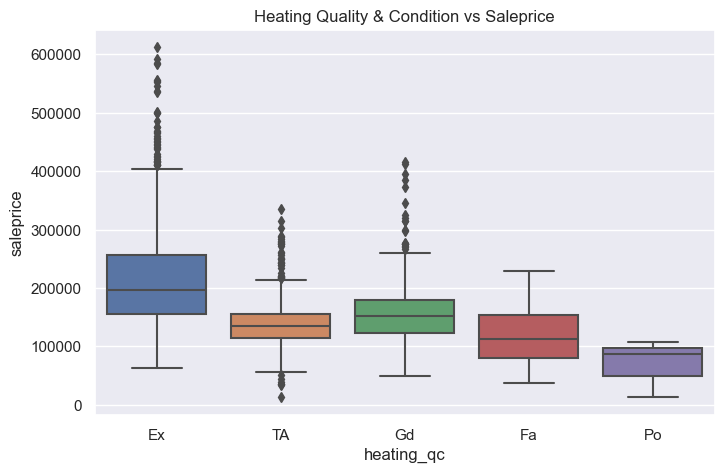

In [30]:
plt.figure(figsize = (8,5))

sns.boxplot(data=train, x="heating_qc", y="saleprice")

plt.title('Heating Quality & Condition vs Saleprice');

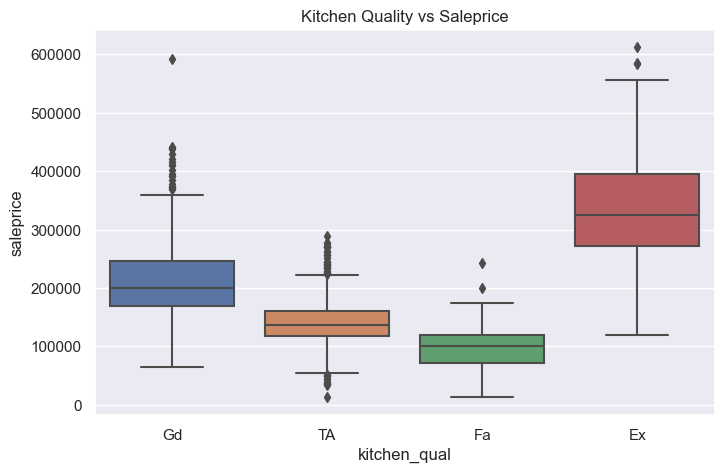

In [31]:
plt.figure(figsize = (8,5))

sns.boxplot(data=train, x="kitchen_qual", y="saleprice")

plt.title('Kitchen Quality vs Saleprice');

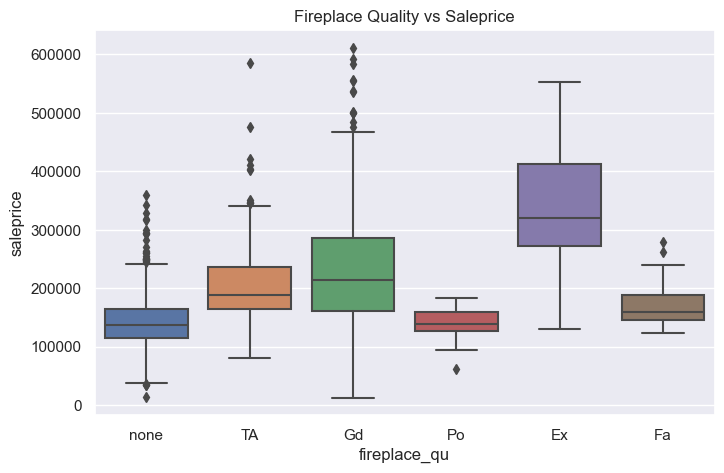

In [32]:
plt.figure(figsize = (8,5))

sns.boxplot(data=train, x="fireplace_qu", y="saleprice")

plt.title('Fireplace Quality vs Saleprice');

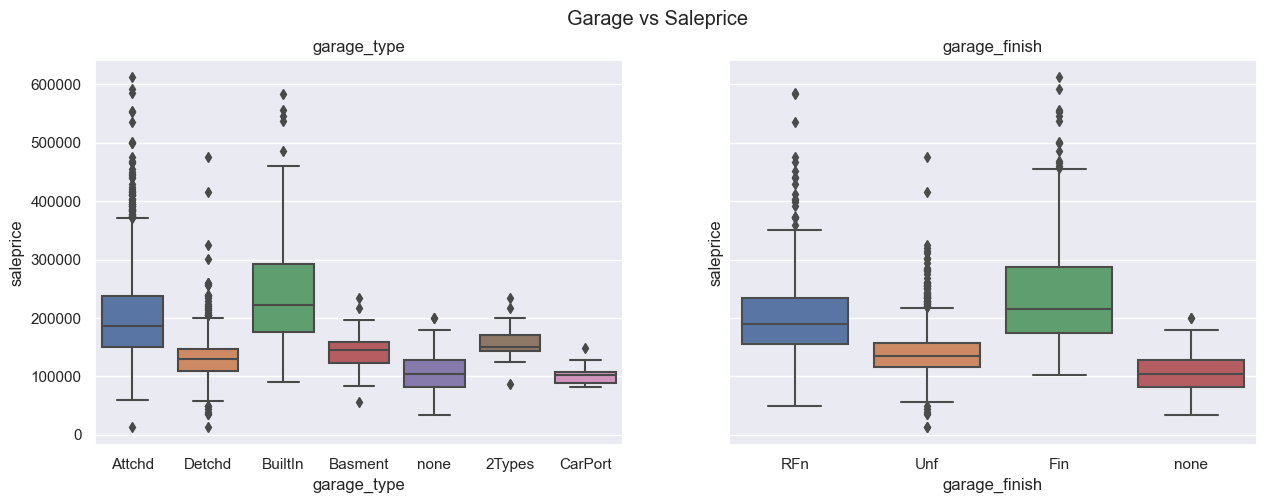

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

sns.boxplot(ax=axes[0], data=train, x="garage_type", y="saleprice")
axes[0].set_title('garage_type')

sns.boxplot(ax=axes[1], data=train, x="garage_finish", y="saleprice")
axes[1].set_title('garage_finish')

fig.suptitle('Garage vs Saleprice');

Categoric variables selected = 'ms_zoning', 'neighborhood', 'exter_qual', 'kitchen_qual', 'fireplace_qu'

Above based on boxplot distribution, these features have categories spread over a wider range of saleprice. 

### Alternative
Alternatively, a function can be written for plotting of box plots of categoric variables vs sale price.

In [34]:
len(train_cat['garage_type'].unique())

7

In [35]:
def boxplot(df): 
    for n in df.columns:
        if len(df[n].unique())>= 7:
            plt.figure(figsize = (20,10))
            
            sns.boxplot(data=train, x=n, y="saleprice")
            
            plt.title(f'{n} vs Saleprice');
        
        else:
            plt.figure(figsize = (8,5))
            
            sns.boxplot(data=train, x=n, y="saleprice")
            
            plt.title(f'{n} vs Saleprice');
        

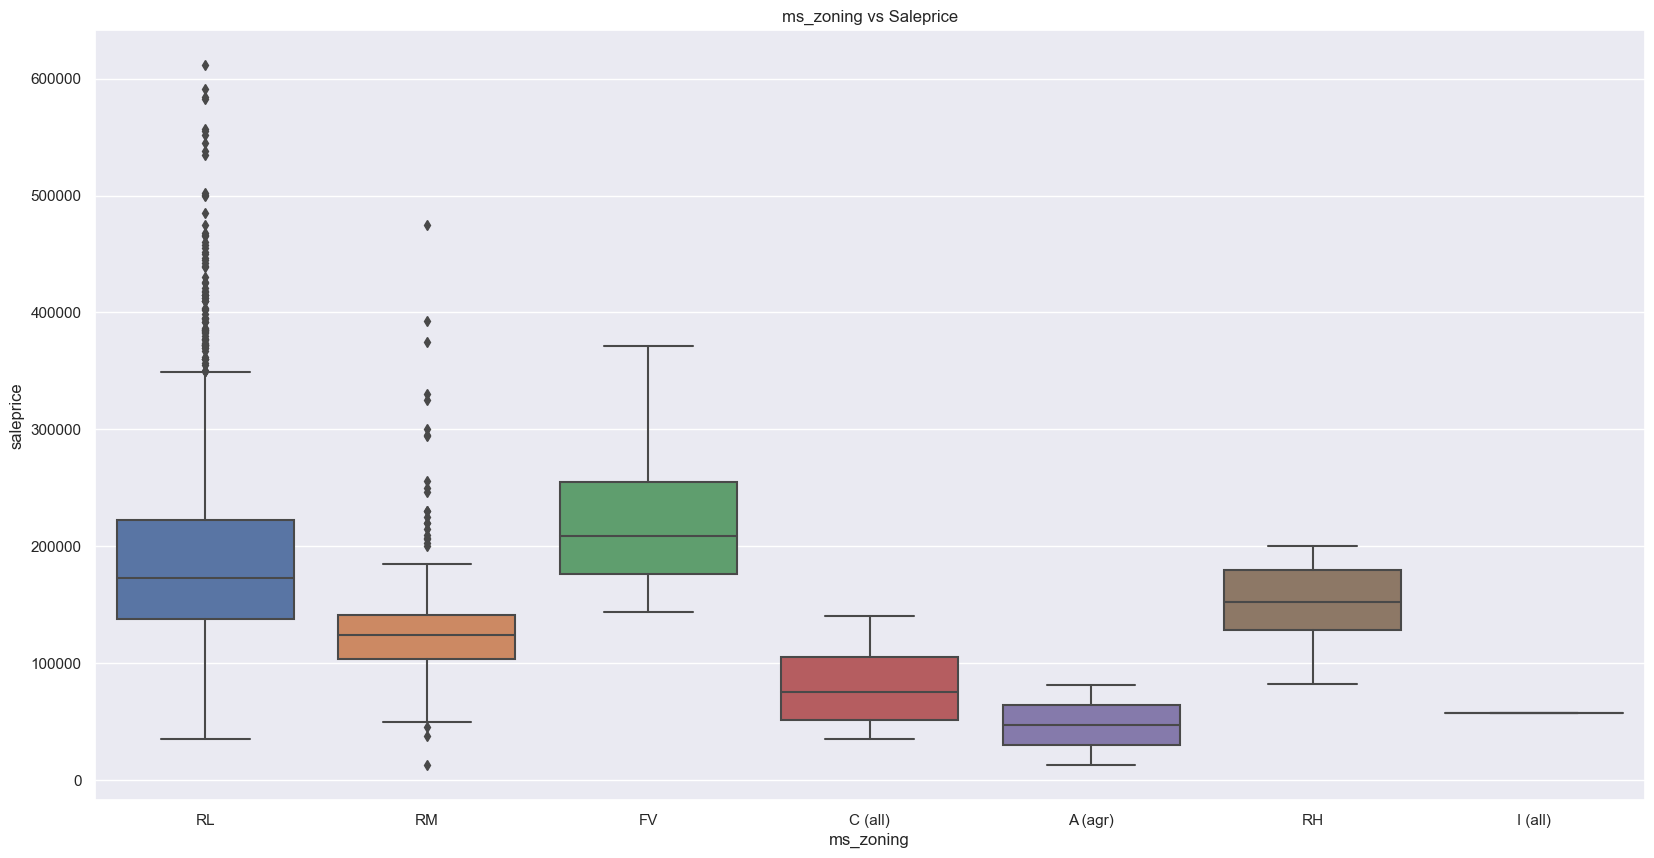

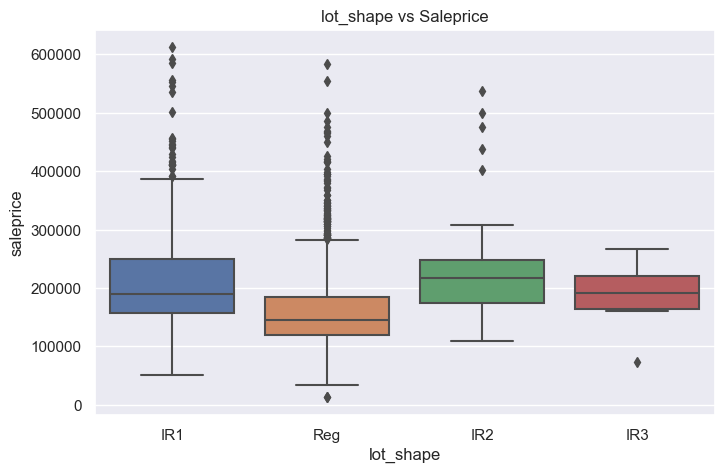

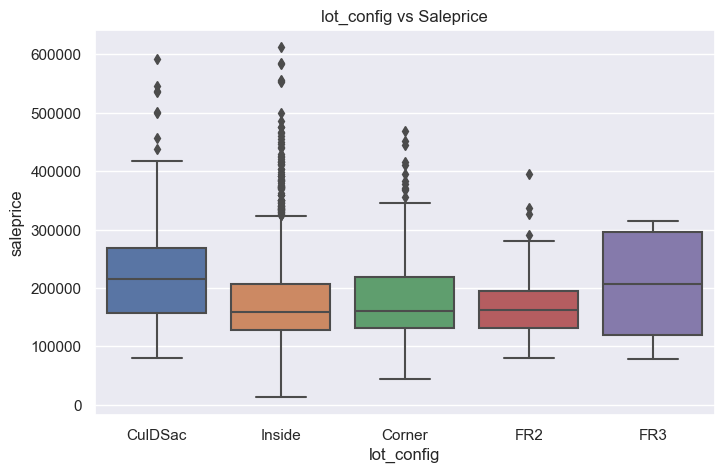

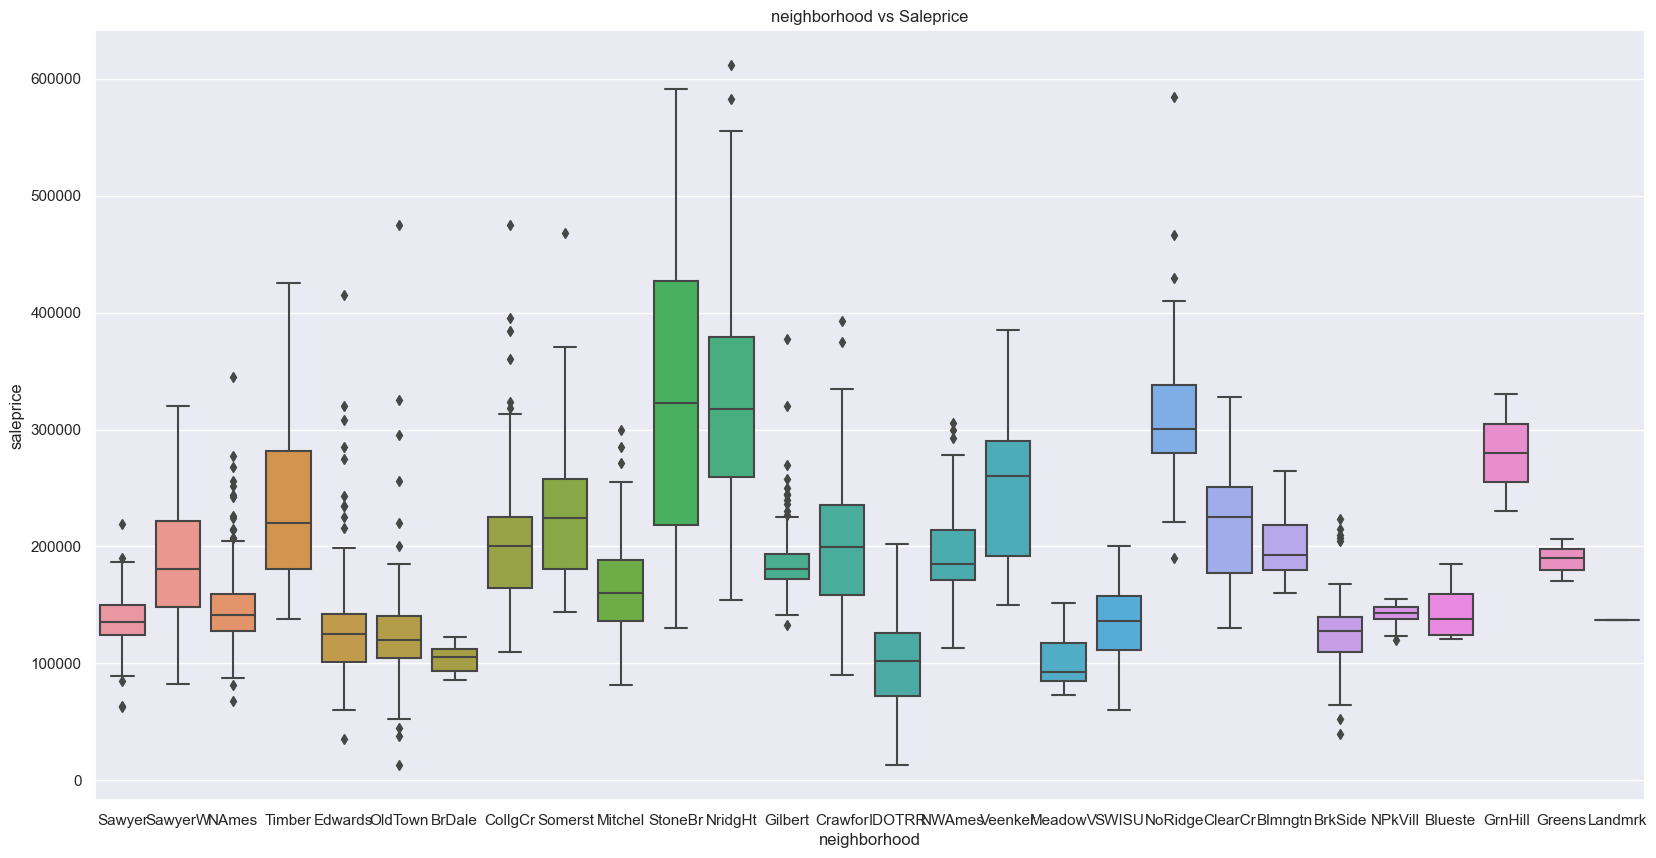

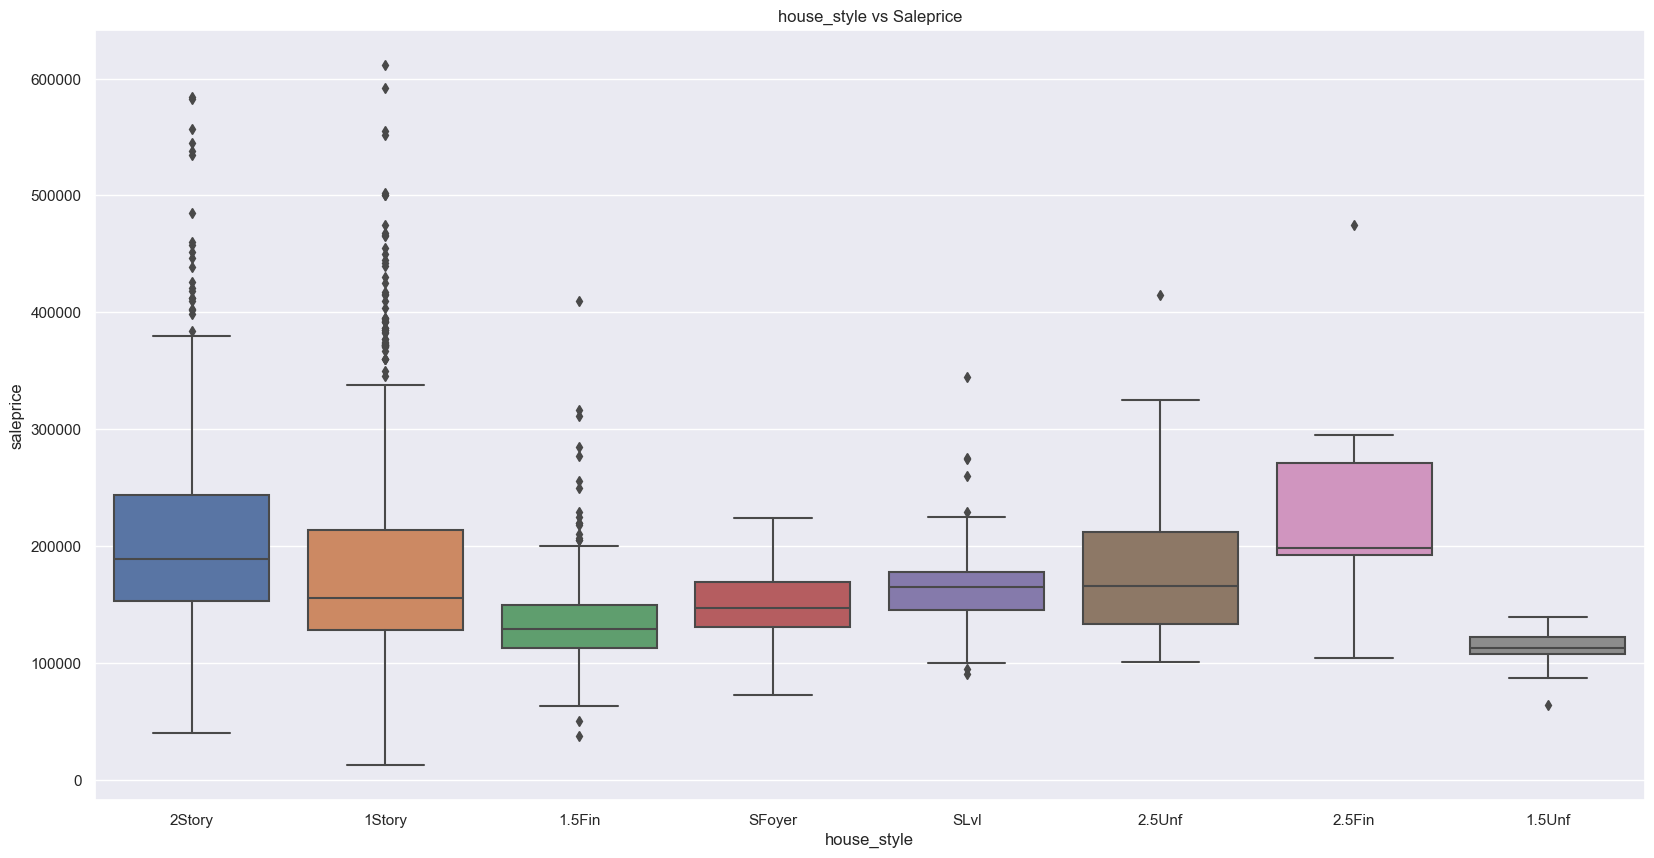

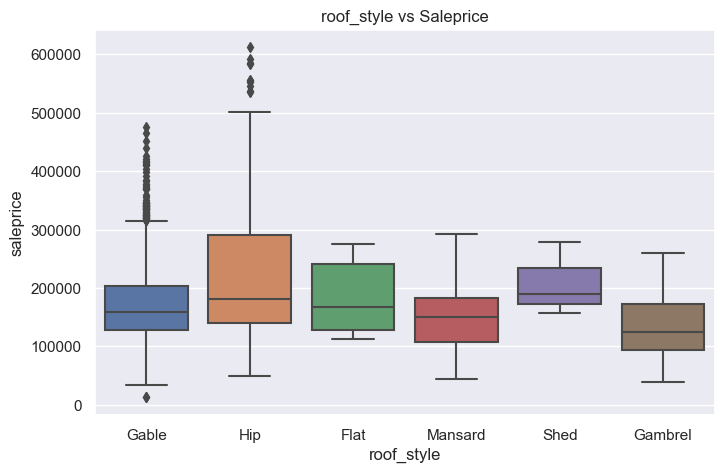

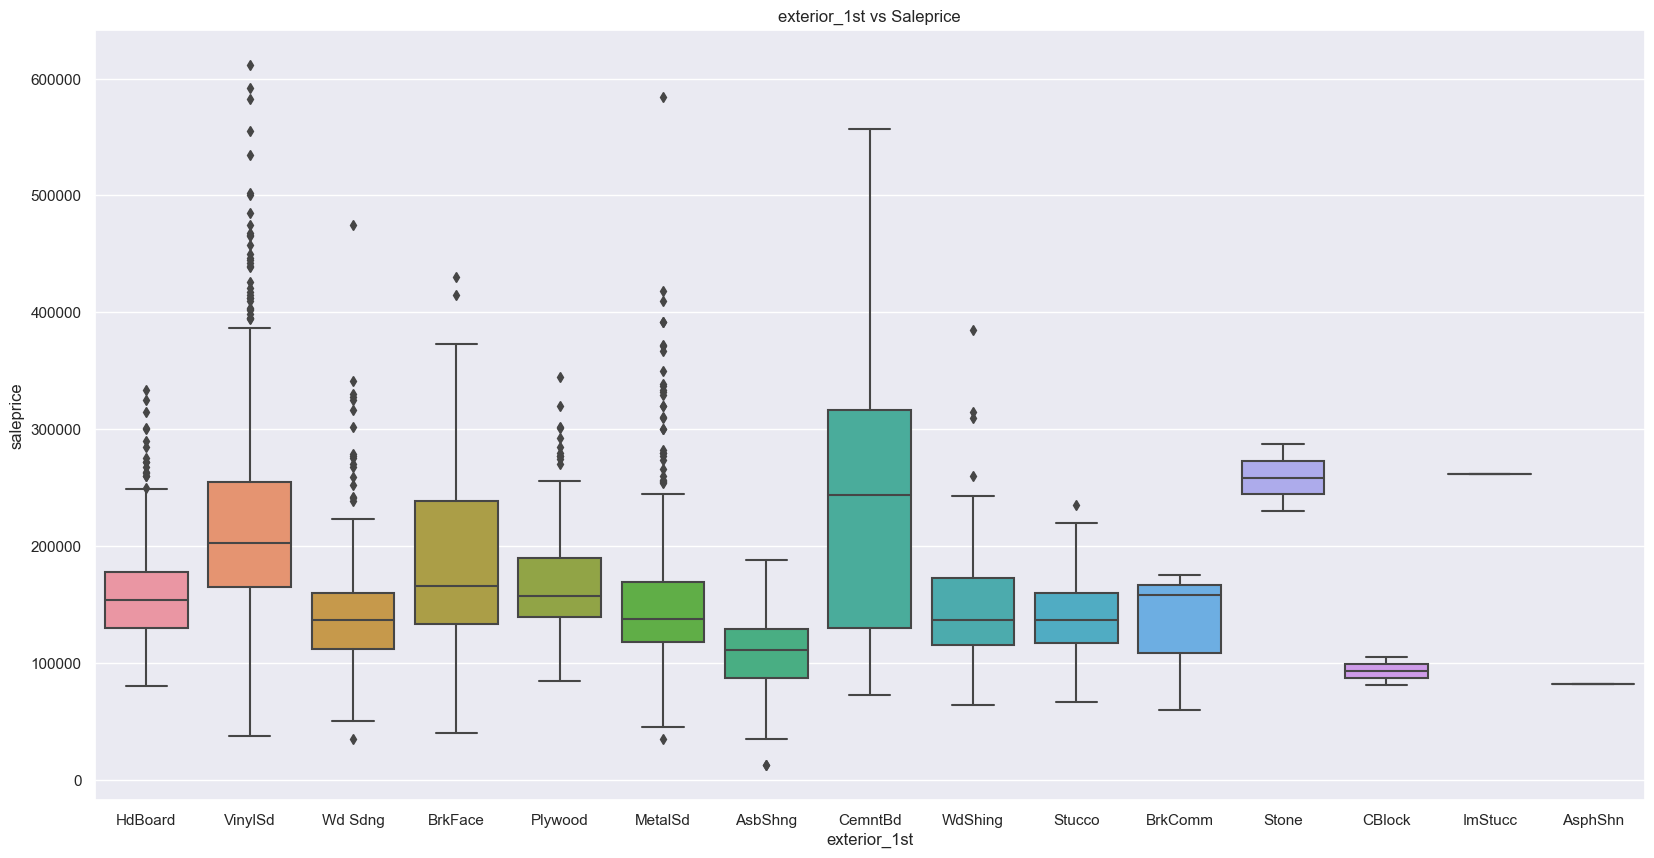

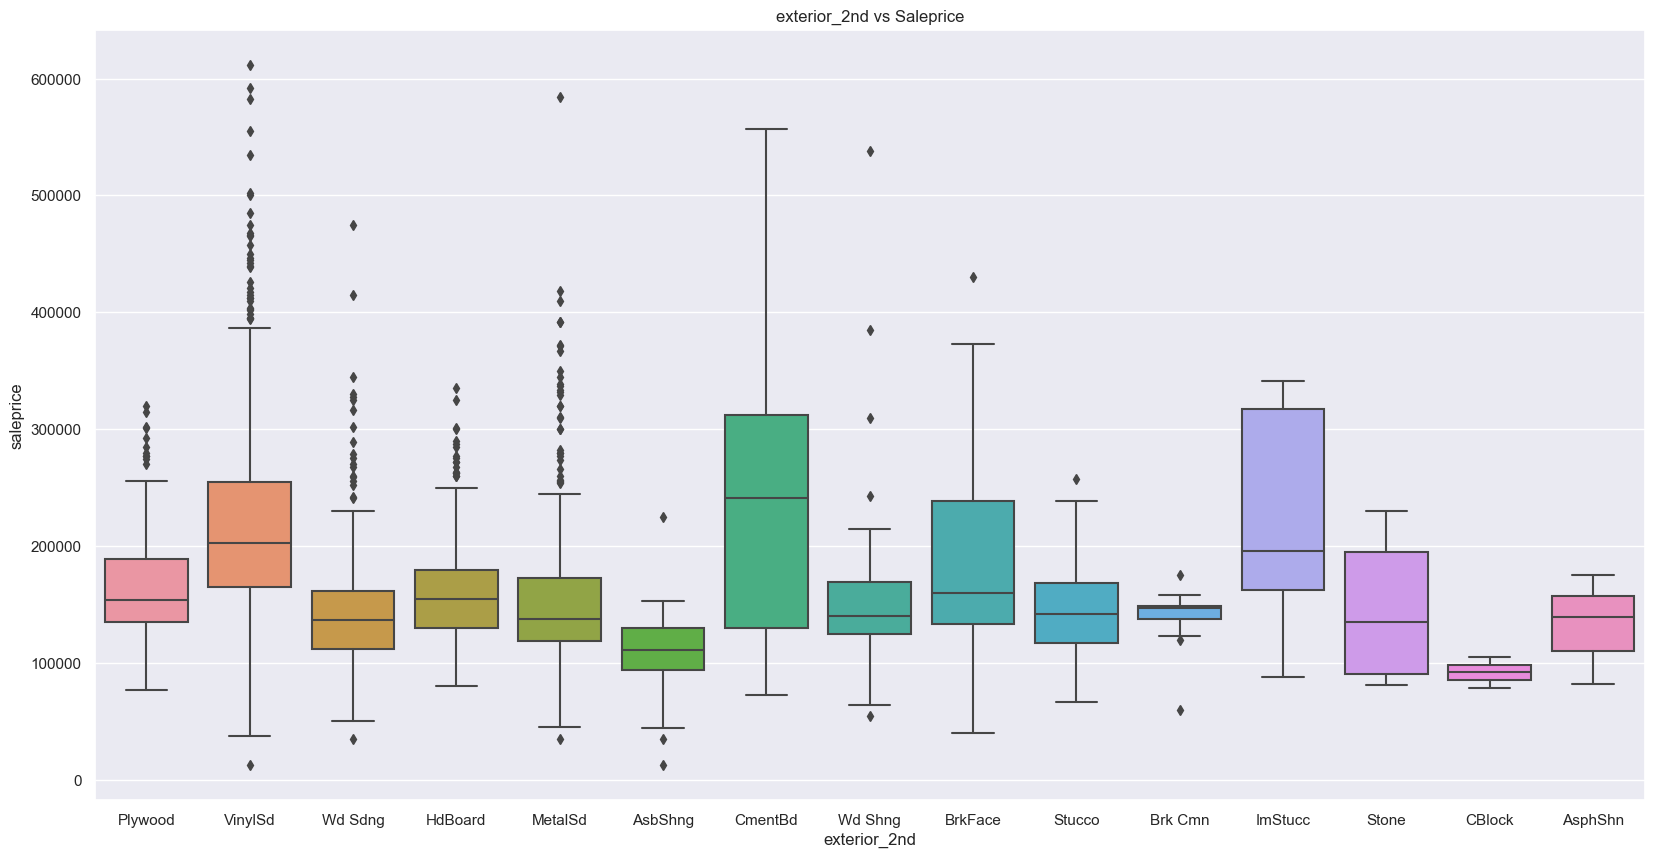

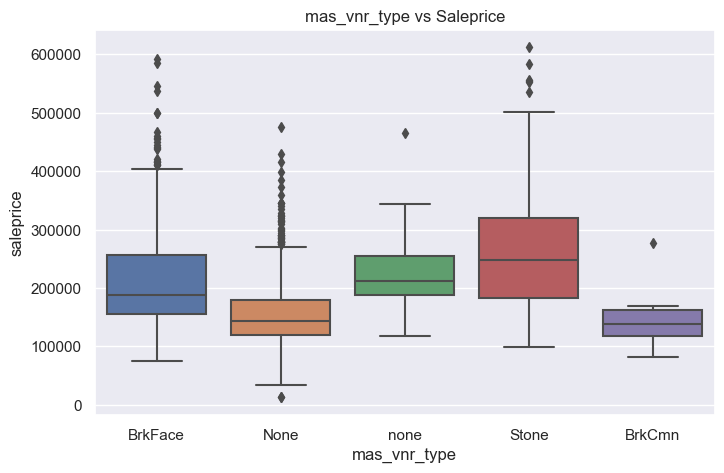

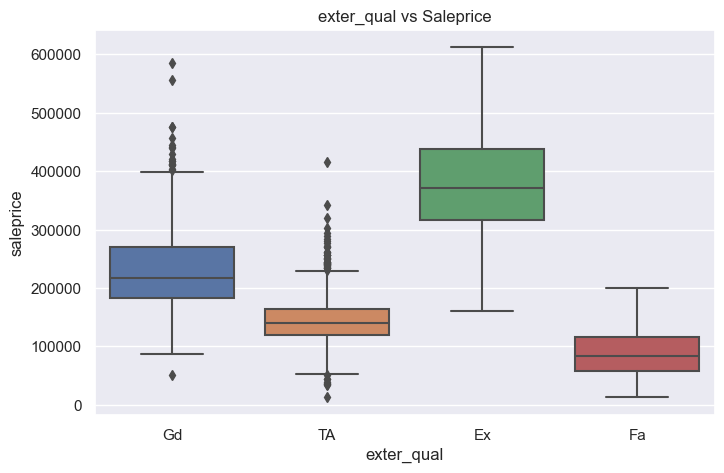

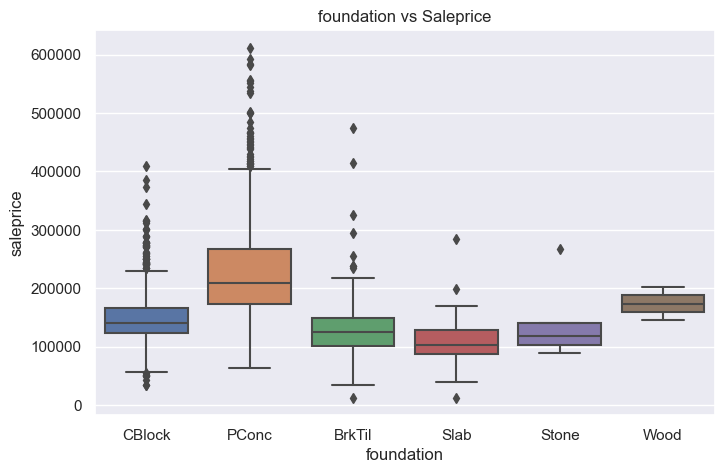

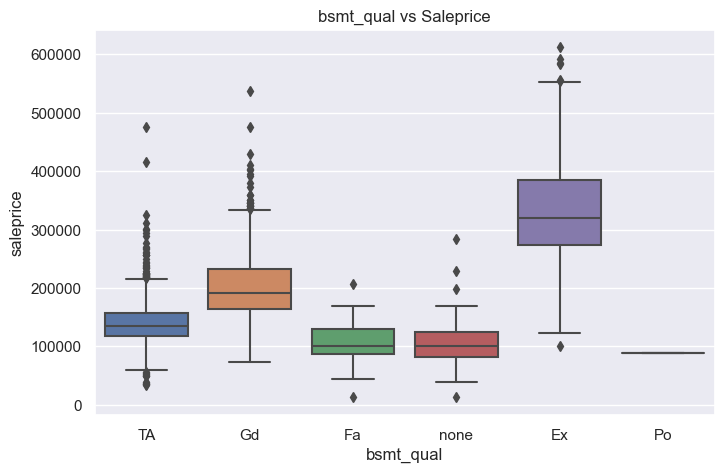

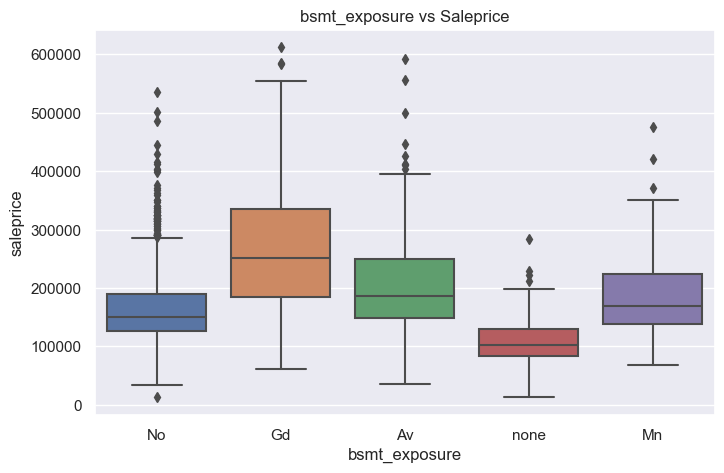

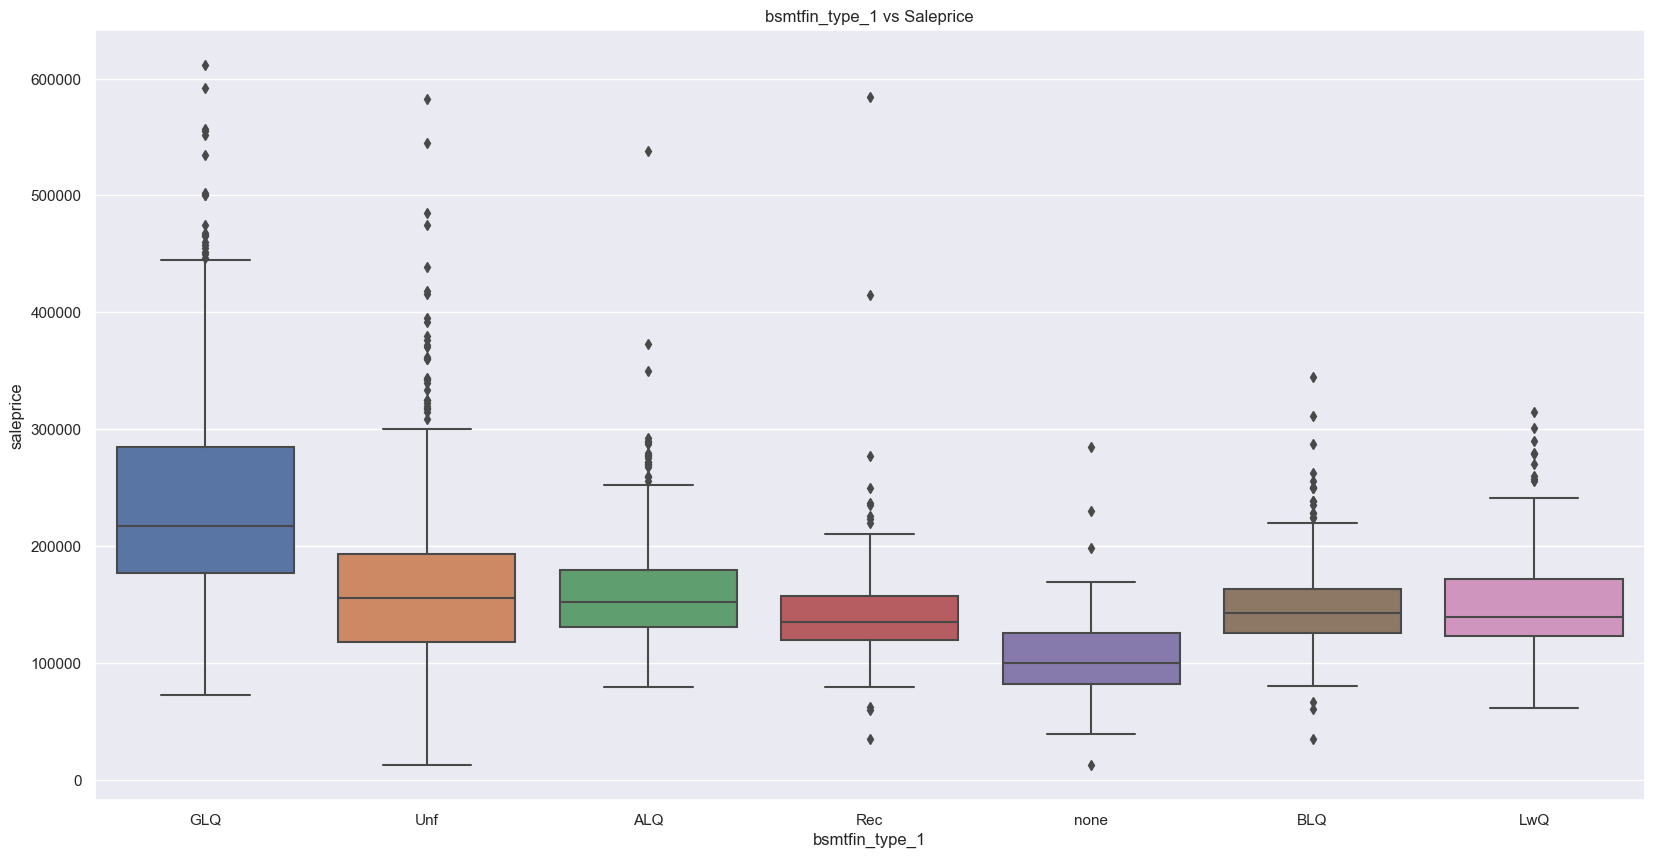

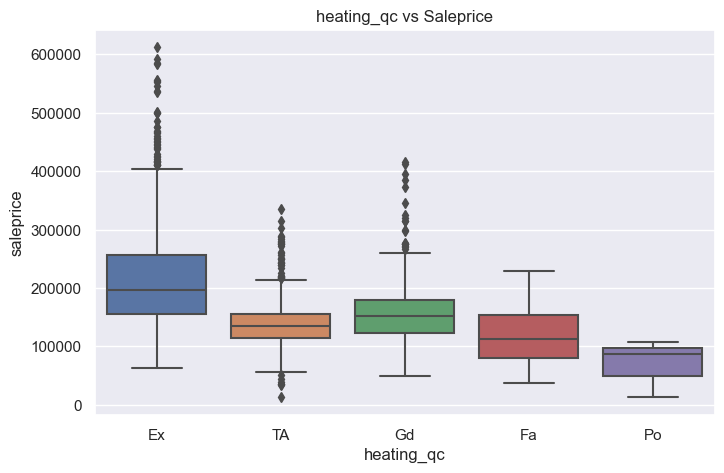

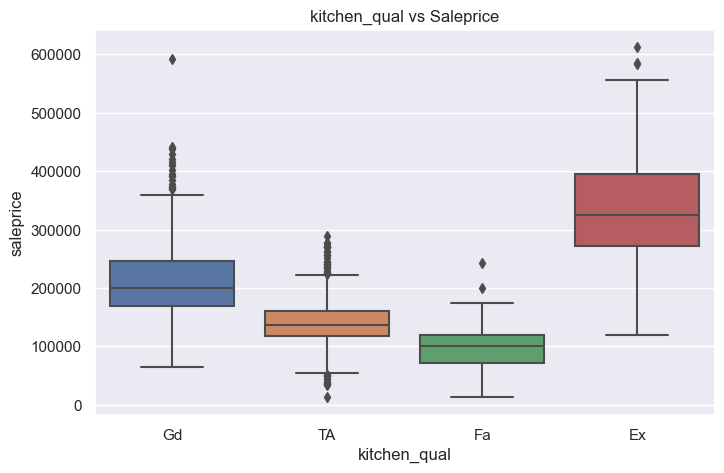

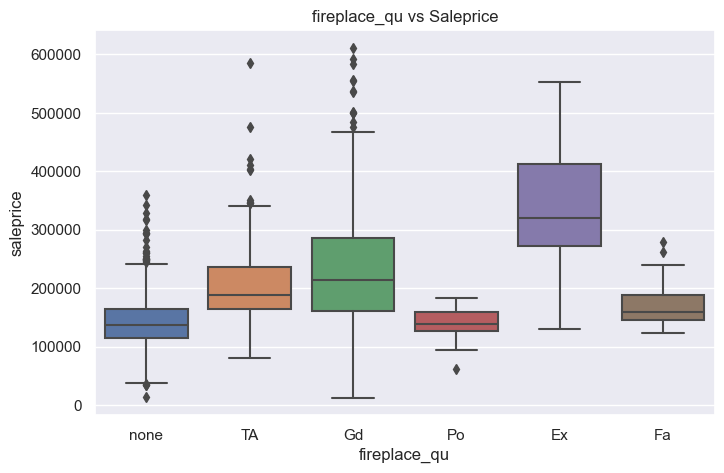

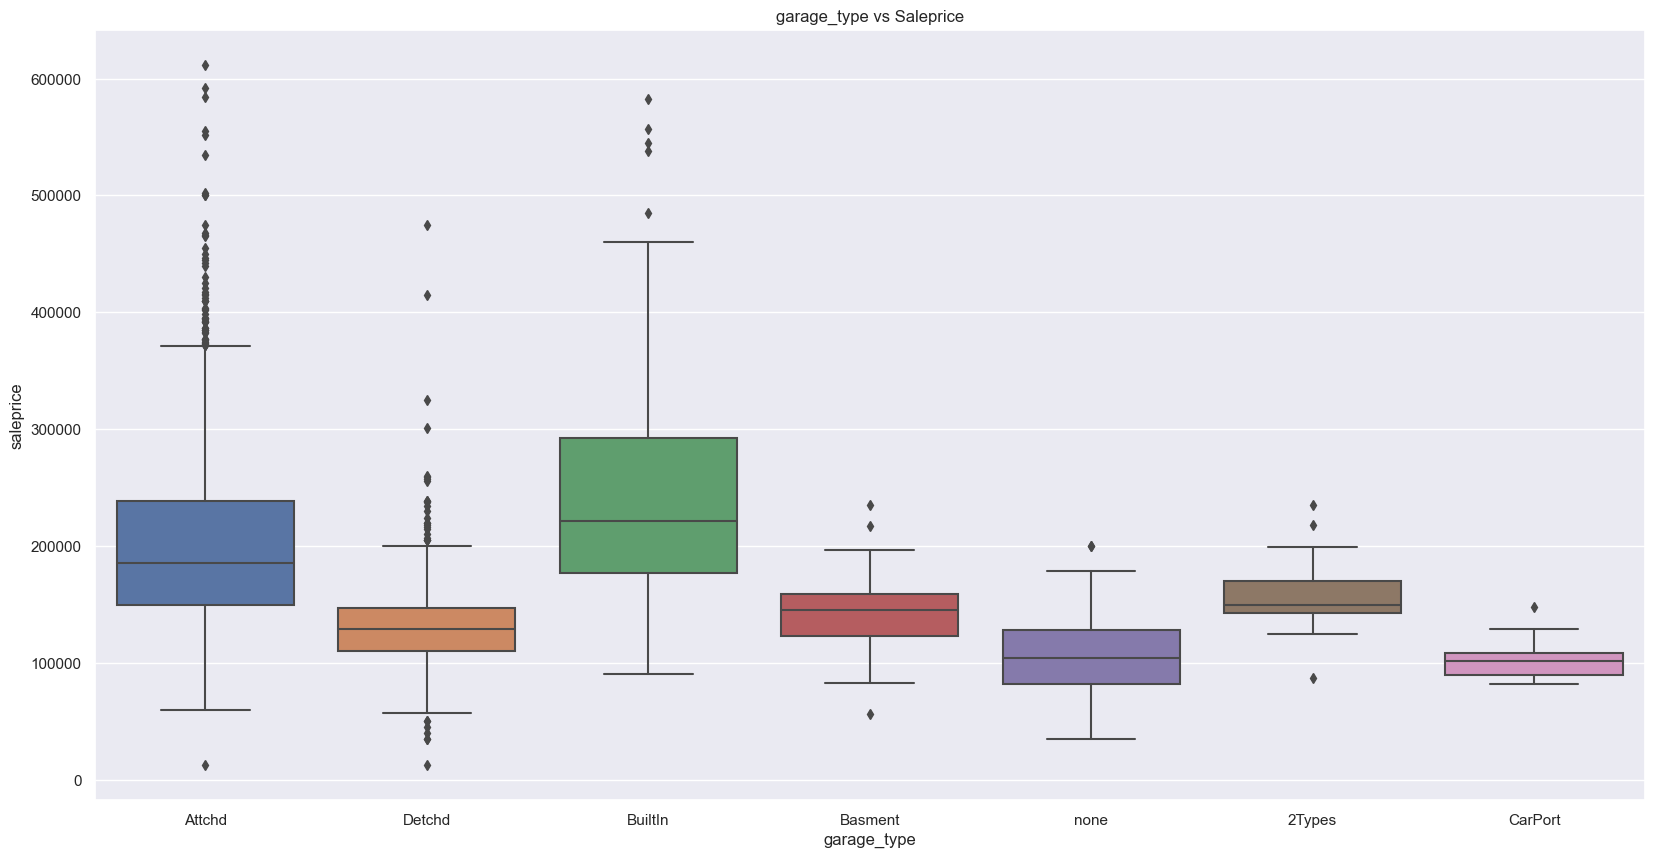

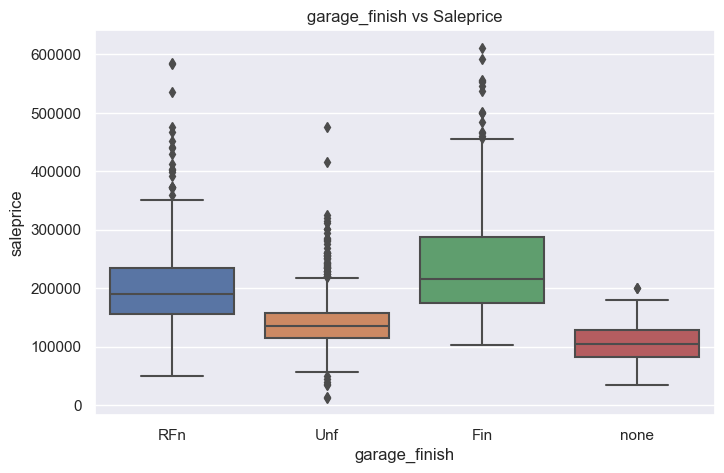

In [36]:
boxplot(train_cat)

<a id="variables-selection"></a>
# Variables Selection

Final numeric features selected = 'overall_qual', 'gr_liv_area', 'garage_area', '1st_flr_sf', 'year_built', 'full_bath', 'mas_vnr_area' and 'fireplaces'

Final cat features selected = 'ms_zoning', 'neighborhood', 'exter_qual', 'kitchen_qual', 'fireplace_qu' and 'bsmt_qual' 

In [39]:
train_selected = train[['saleprice','fireplaces', 'overall_qual', 'gr_liv_area', 'garage_area', '1st_flr_sf', 'year_built', 'full_bath', 'mas_vnr_area', 'ms_zoning', 'neighborhood', 'exter_qual', 'kitchen_qual', 'fireplace_qu', 'bsmt_qual']]

In [40]:
print(train_selected.shape)
train_selected.head()

(2051, 15)


,saleprice,fireplaces,overall_qual,gr_liv_area,garage_area,1st_flr_sf,year_built,full_bath,mas_vnr_area,ms_zoning,neighborhood,exter_qual,kitchen_qual,fireplace_qu,bsmt_qual
0,130500,0,6,1479,475.0,725,1976,2,289.0,RL,Sawyer,Gd,Gd,none,TA
1,220000,1,7,2122,559.0,913,1996,2,132.0,RL,SawyerW,Gd,Gd,TA,Gd
2,109000,0,5,1057,246.0,1057,1953,1,0.0,RL,NAmes,TA,Gd,none,TA
3,174000,0,5,1444,400.0,744,2006,2,0.0,RL,Timber,TA,TA,none,Gd
4,138500,0,6,1445,484.0,831,1900,2,0.0,RL,SawyerW,TA,TA,none,Fa


In [41]:
train_selected = pd.get_dummies(train_selected, columns=['ms_zoning', 'neighborhood', 'exter_qual', 'kitchen_qual', 'fireplace_qu', 'bsmt_qual'], drop_first=True)

In [42]:
train_selected.to_csv('./datasets/train_selected.csv', index=False)

Similarly, should be done for test.csv

In [51]:
test_selected = test[['id', 'fireplaces', 'overall_qual', 'gr_liv_area', 'garage_area', '1st_flr_sf', 'year_built', 'full_bath', 'mas_vnr_area', 'ms_zoning', 'neighborhood', 'exter_qual', 'kitchen_qual', 'fireplace_qu', 'bsmt_qual']]

In [52]:
print(test_selected.shape)
test_selected.head()

(878, 15)


,id,fireplaces,overall_qual,gr_liv_area,garage_area,1st_flr_sf,year_built,full_bath,mas_vnr_area,ms_zoning,neighborhood,exter_qual,kitchen_qual,fireplace_qu,bsmt_qual
0,2658,0,6,1928,440,908,1910,2,0.0,RM,OldTown,TA,Fa,none,Fa
1,2718,0,5,1967,580,1967,1977,2,0.0,RL,Sawyer,TA,TA,none,Gd
2,2414,1,7,1496,426,664,2006,2,0.0,RL,Gilbert,Gd,Gd,Gd,Gd
3,1989,0,5,968,480,968,1923,1,0.0,RM,OldTown,Gd,TA,none,TA
4,625,2,6,1394,514,1394,1963,1,247.0,RL,NAmes,TA,TA,Gd,Gd


In [53]:
test_selected = pd.get_dummies(test_selected, columns=['ms_zoning', 'neighborhood', 'exter_qual', 'kitchen_qual', 'fireplace_qu', 'bsmt_qual'], drop_first=True)

In [54]:
test_selected.to_csv('./datasets/test_selected.csv', index=False)

<a id="summary"></a>
# Summary

There are 39 numeric variables including sale price and 42 categorical variables, totalling 81 variables given. The process of streamlining the variables was split for numeric and categorical. 

#### Numeric Variables
A heatmap correlation between only the numeric variables was plotted to identify the multicollinearity between the variables. This was compared with a second heatmap correlation between the numeric variables and sale price. 
- Findings included that overall quality has the most correlations of more than 0.5 with 7 other features, garage area, garage cars, full bath, ground living area, total basement square feet, year remod/add and year built. 
- Garage cars has a very high correlation with garage_area at 0.89.
- Ground living area has a very high correlation with total rooms above ground at 0.81.
- Total basement square feet has a very high correlation with 1st floor square feet at 0.81.

It is likely that some of these highly correlated features can be dropped as they may predict the same response. 

The final numeric variables selected included 'overall_qual', 'gr_liv_area', 'garage_area', '1st_flr_sf', 'year_built', 'full_bath', 'mas_vnr_area' and 'fireplaces' as these have high correlation with sale price and if there were multicollinearity between the variables, the one with a higher correlation with sale price was selected. 

#### Categorical Variables
There are 23 categorical variables with common value occuring more than 80% in the data. These were dropped before boxplots were plotted for the remaining categorical variables vs sale price. 

The final categorical variables selected included 'ms_zoning', 'neighborhood', 'exter_qual', 'kitchen_qual', 'fireplace_qu' and 'bsmt_qual' as these variables had a wider range over sale price as seen in the respective box plots. 

#### Sale price
Average saleprice observed at 181469. The 5 highest saleprice 611657, 591587, 584500, 582933, 556581 while the 5 lowest saleprice 35311, 35000, 34900, 13100, 12789. The distribution was right skewed, suggesting that some houses were much more expensive that the rest. 

#### Final Selection
The final selection consisted of 14 features, of which 8 are numeric variables and 6 are categorical variables. 